## Dataset Overview
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [9]:

import seaborn as sns
from sklearn import metrics

# remove warnings from the output
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd

file_path = 'data/kc_house_data.csv'
original_df = pd.read_csv(file_path)

print(original_df.head())
print("Number of rows:", original_df.shape[0])

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [11]:
# info
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

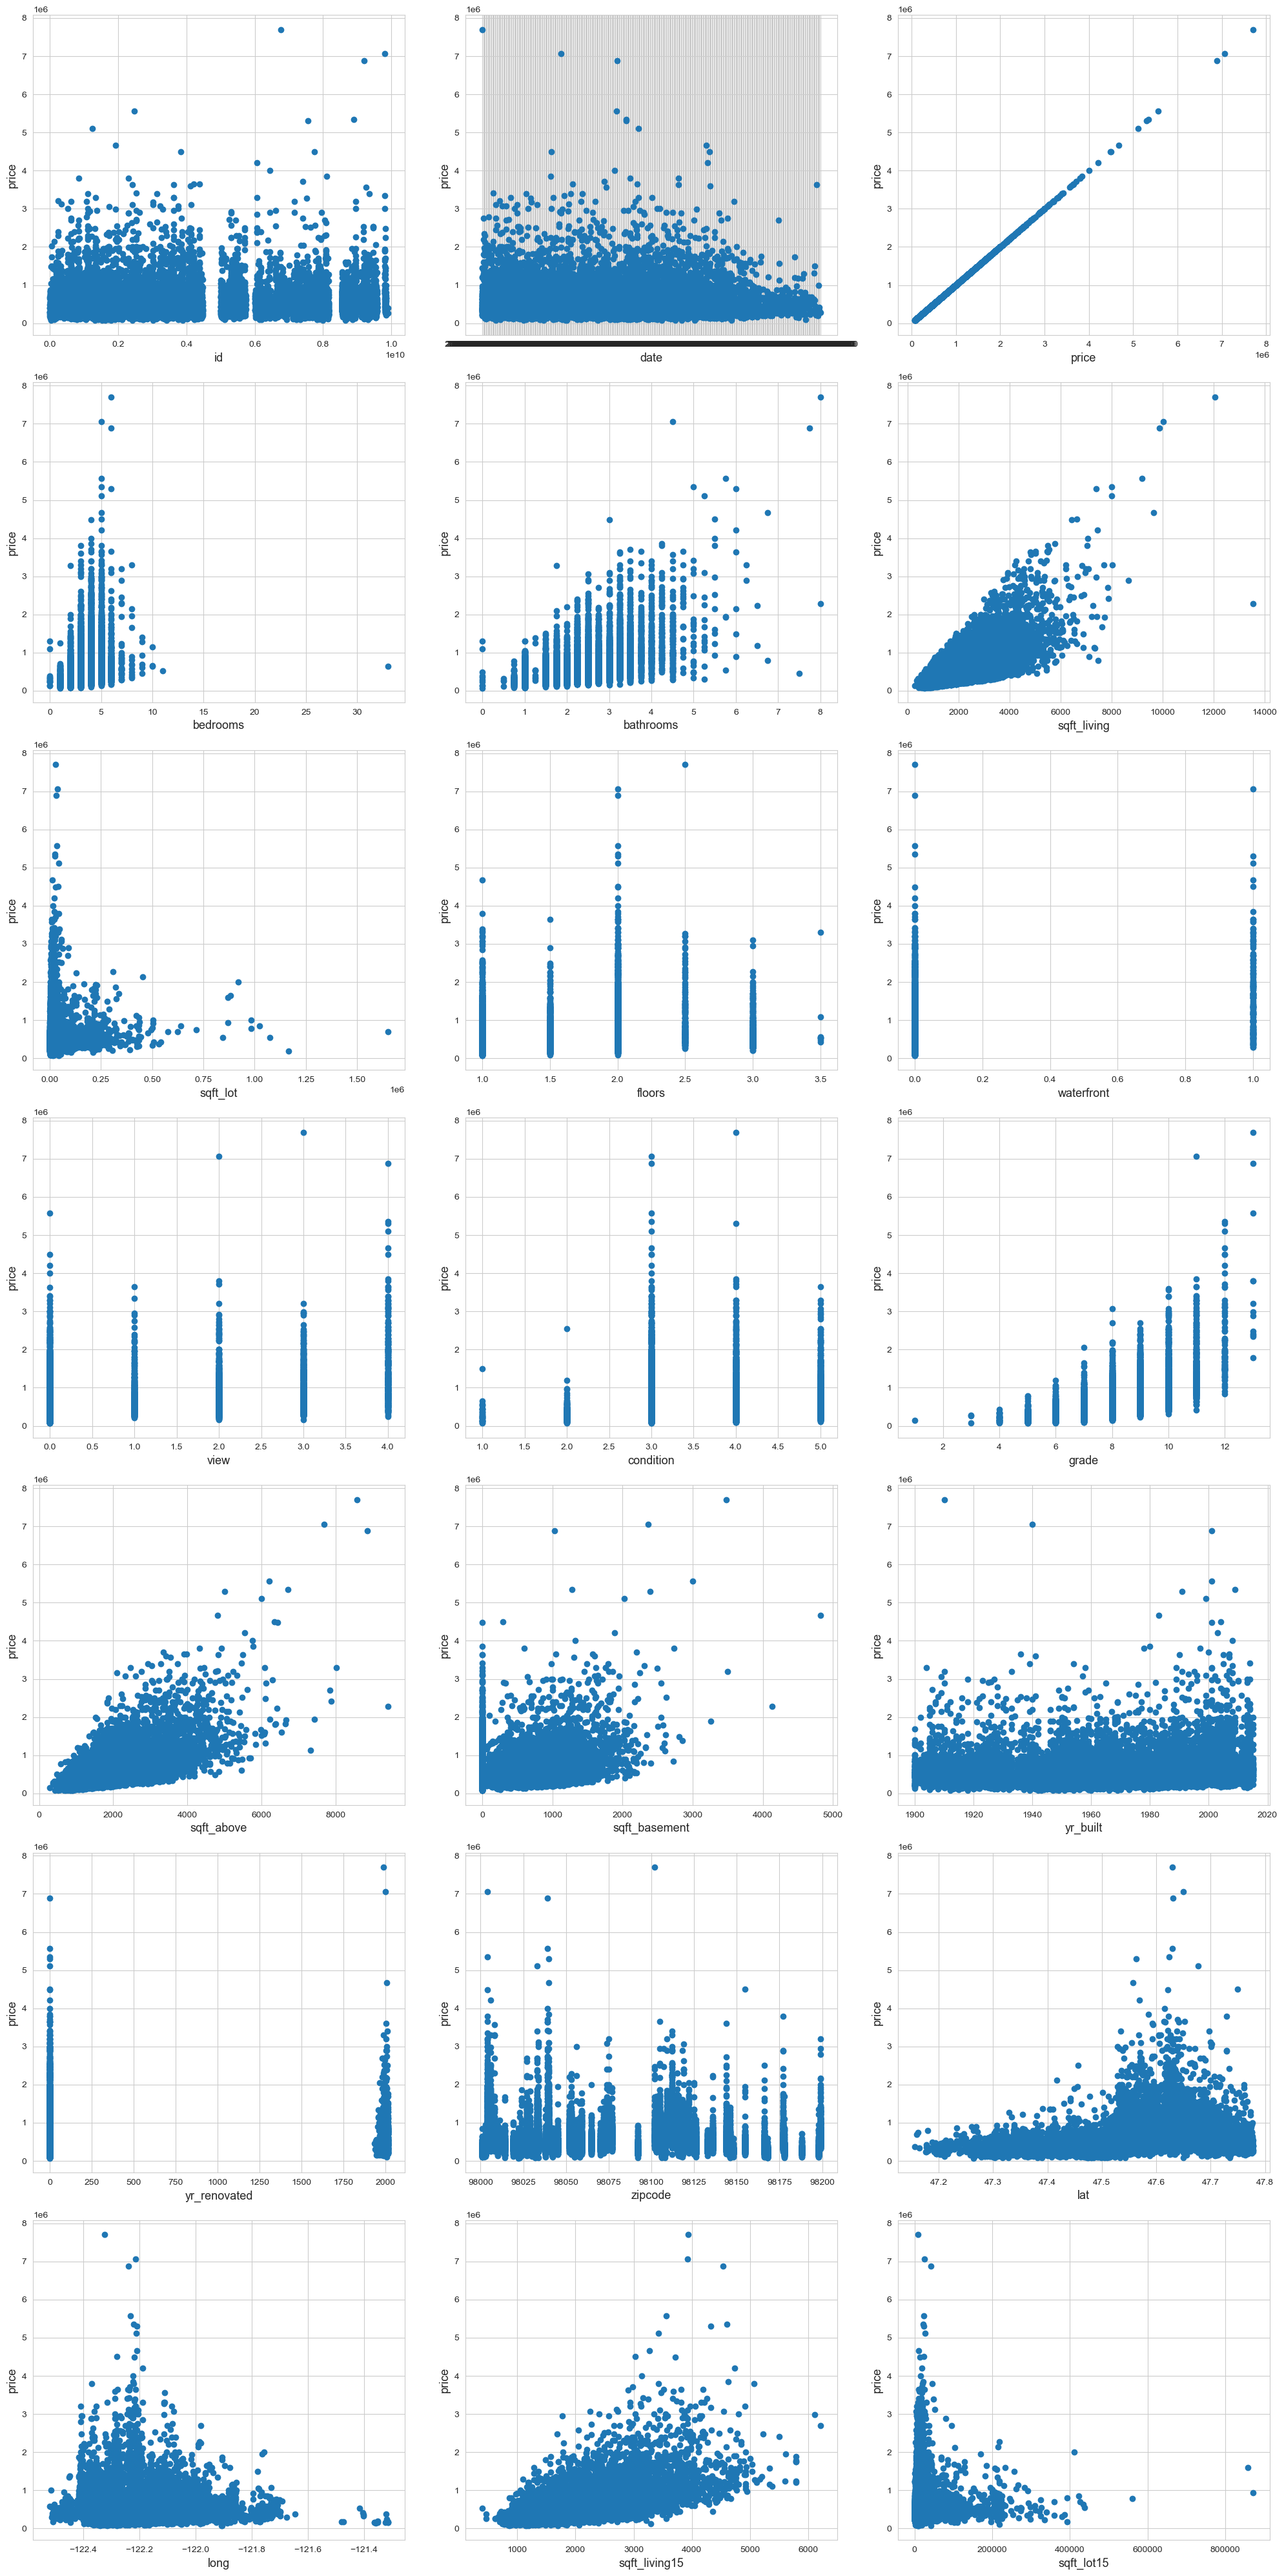

In [12]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=original_df.shape[1] // 3, figsize=(20, 40))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, col in enumerate(original_df.columns):
    # Check if we have more columns than subplots
    if i < len(axs):
        axs[i].scatter(x = original_df[col], y = original_df['price'])
        axs[i].set_ylabel('price', fontsize=13)
        axs[i].set_xlabel(col, fontsize=13)

plt.tight_layout()
plt.show()

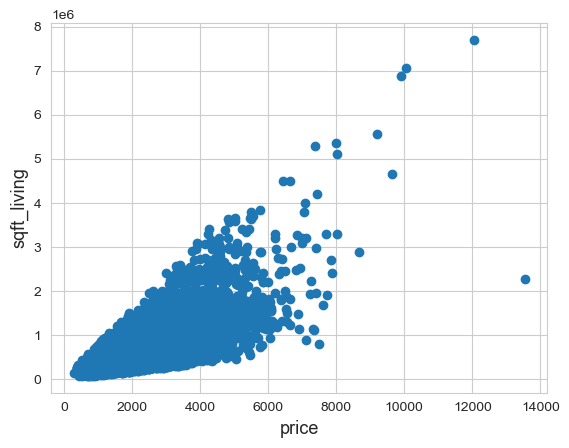

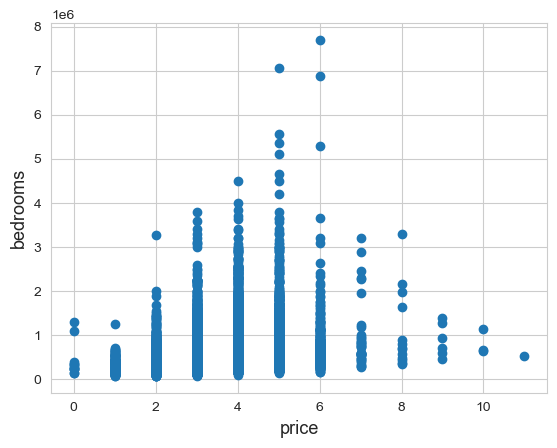

In [13]:
#Deleting outliers
df = original_df.drop(original_df[(original_df['sqft_living']>12000) & (original_df['price']<3000000)].index)
df = original_df.drop(original_df[(original_df['bedrooms']>30) & (original_df['price']<1000000)].index)
df_num = df.select_dtypes(include=['float64', 'int64'])

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['sqft_living'], df['price'])
plt.ylabel('sqft_living', fontsize=13)
plt.xlabel('price', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['bedrooms'], df['price'])
plt.ylabel('bedrooms', fontsize=13)
plt.xlabel('price', fontsize=13)
plt.show()

In [14]:
# Check null
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [15]:
# Check duplicated
print(df.duplicated().sum())

0


In [16]:
# drop column id
df.drop('id', axis=1, inplace=True)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

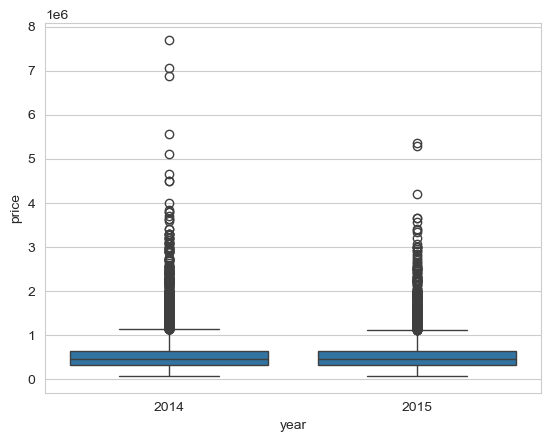

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

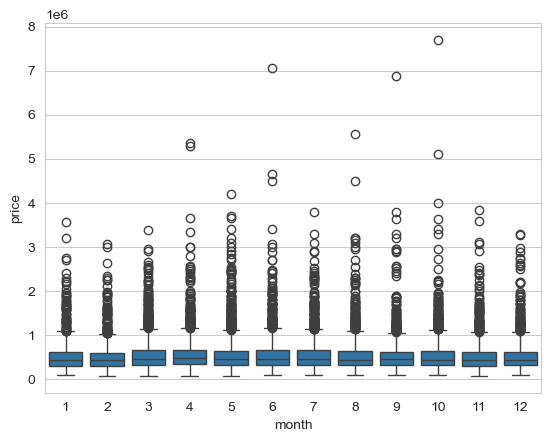

In [18]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

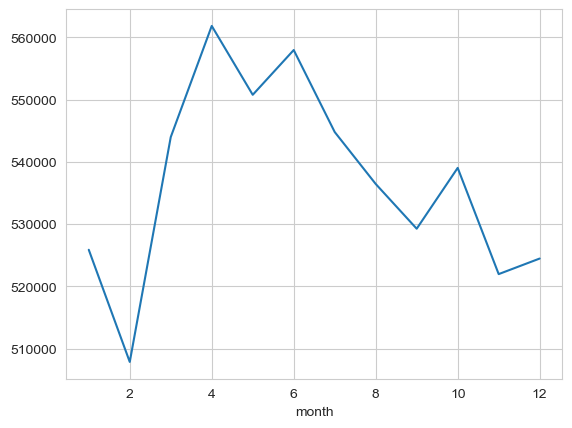

In [19]:
df.groupby('month').mean()['price'].plot() 

<Axes: xlabel='year'>

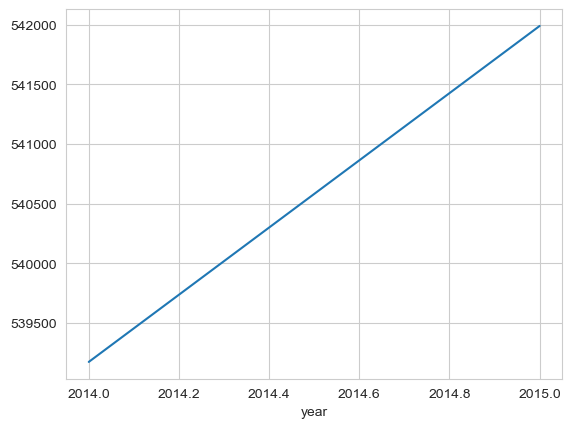

In [20]:
df.groupby('year').mean()['price'].plot() 

In [21]:
df = df.drop('date',axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [22]:
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [23]:
# Check categorical of number columns
df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object'])
# filter all numeric columns that are categorical, convert them to object, and add them to the categorical dataframe, remove them from the numeric dataframe
for col in df_num.columns:
    if len(df_num[col].unique()) < 50:
        df_cat[col] = df_num[col].astype('object')
        df_num.drop(col, axis=1, inplace=True)
print(df_num.columns)
print(df_cat.columns)

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'month', 'year'],
      dtype='object')


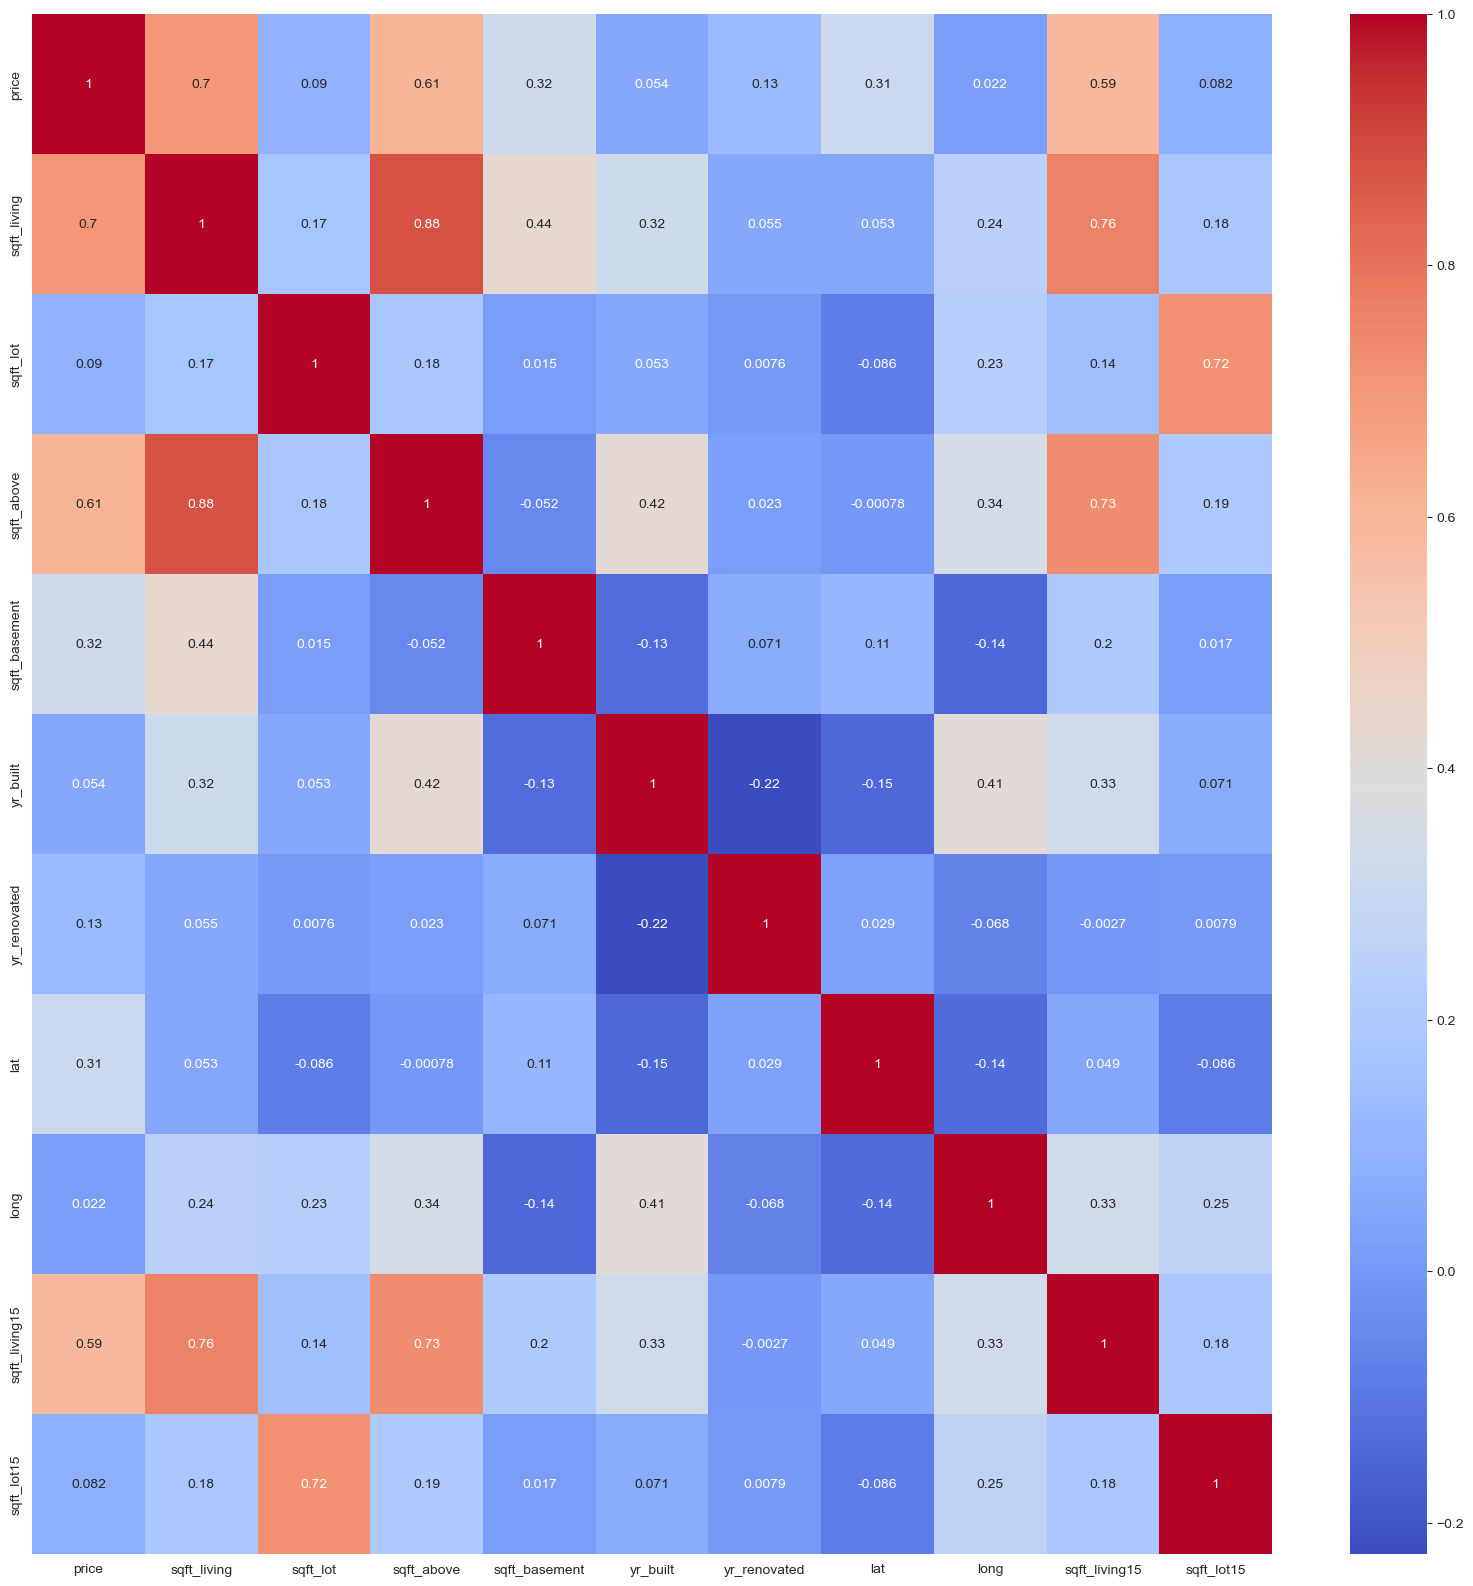

In [24]:
cormap = df_num.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormap, annot=True, cmap='coolwarm')
plt.show()



 ## Exploratory Data Analysis

The dataset has 19 columns and 21613 rows. The columns are:
* categorical: waterfront, view, grade, condition, bedrooms, bathrooms, floors
* numerical: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

To visualize the numerical variables, we'll turn them into categorical variables.

In [25]:
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Create a new column with 3 categories: low, average, high quality
# def grade_cat(grade):
#     if grade >= 11:
#         return 'high'
#     elif grade <= 3:
#         return 'low'
#     else:
#         return 'average'
# df['grade_cat'] = df['grade'].apply(grade_cat)
# df['grade_cat'].value_counts()

In [26]:
#yr_renovated - The year of the house’s last renovation. Create a new column with 2 categories: renovated, not renovated
def renovated_cat(year):
    if year == 0:
        return 'not renovated'
    else:
        return 'renovated'
df['renovated_cat'] = df['yr_renovated'].apply(renovated_cat)
df['renovated_cat'].value_counts()

renovated_cat
not renovated    20698
renovated          914
Name: count, dtype: int64

In [27]:
#yr_built - The year the house was initially built. Create a new column with 3 categories: old, middle, new
def built_cat(year):
    if year < 1950:
        return 'old'
    elif year > 1999:
        return 'new'
    else:
        return 'middle'
df['built_cat'] = df['yr_built'].apply(built_cat)
df['built_cat'].value_counts()

built_cat
middle    11917
old        4936
new        4759
Name: count, dtype: int64

In [28]:
#sqft_basement - The square footage of the interior housing space that is below ground level. Create a new column with 2 categories: has basement, no basement
def basement_cat(sqft):
    if sqft == 0:
        return 'no basement'
    else:
        return 'has basement'
df['basement_cat'] = df['sqft_basement'].apply(basement_cat)
df['basement_cat'].value_counts()

basement_cat
no basement     13126
has basement     8486
Name: count, dtype: int64

In [29]:
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not. Create a new column with 2 categories: has waterfront, no waterfront
# def waterfront_cat(waterfront):
#     if waterfront == 0:
#         return 'no waterfront'
#     else:
#         return 'has waterfront'
# df['waterfront_cat'] = df['waterfront'].apply(waterfront_cat)

In [30]:
#view - An index from 0 to 4 of how good the view of the property was. Create a new column with 4 categories: bad view, average view, good view, very good view
# def view_cat(view):
#     if view == 0:
#         return 'bad view'
#     elif view == 1:
#         return 'average view'
#     elif view == 2:
#         return 'good view'
#     else:
#         return 'very good view'
# df['view_cat'] = df['view'].apply(view_cat)
# df['view_cat'].value_counts()

In [31]:
#floors - Number of floors. Create a new column with 2 categories: 1 floor, more than 1 floor
# def floors_cat(floors):
#     if floors == 1:
#         return '1 floor'
#     else:
#         return 'more than 1 floor'
# df['floors_cat'] = df['floors'].apply(floors_cat)
# df['floors_cat'].value_counts()

In [32]:
#bedrooms - Number of bedrooms. Create a new column with 2 categories: 1-2 bedrooms, 3 and more bedrooms
# def bedrooms_cat(bedrooms):
#     if bedrooms < 4:
#         return '1-3 bedrooms'
#     else:
#         return '4 and more bedrooms'
# df['bedrooms_cat'] = df['bedrooms'].apply(bedrooms_cat)
# df['bedrooms_cat'].value_counts()

In [33]:
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower. Create a new column with 2 categories: 1-2 bathrooms, 3 and more bathrooms
# def bathrooms_cat(bathrooms):
#     if bathrooms < 3:
#         return '1-2 bathrooms'
#     else:
#         return '3 and more bathrooms'
# df['bathrooms_cat'] = df['bathrooms'].apply(bathrooms_cat)
# df['bathrooms_cat'].value_counts()

In [34]:
#sqft_living - Square footage of the apartments interior living space. Create a new column with 4 categories: small, medium, big, very big
def sqft_living_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_living_cat'] = df['sqft_living'].apply(sqft_living_cat)
df['sqft_living_cat'].value_counts()

sqft_living_cat
medium      9607
small       6218
big         4224
very big    1563
Name: count, dtype: int64

In [35]:
#sqft_lot - Square footage of the land space. Create a new column with 4 categories: small, medium, big, very big
def sqft_lot_cat(sqft):
    if sqft < 5000:
        return 'small'
    elif sqft < 10000:
        return 'medium'
    elif sqft < 15000:
        return 'big'
    else:
        return 'very big'
df['sqft_lot_cat'] = df['sqft_lot'].apply(sqft_lot_cat)
df['sqft_lot_cat'].value_counts()

sqft_lot_cat
medium      10464
small        4932
very big     3273
big          2943
Name: count, dtype: int64

In [36]:
#sqft_above - The square footage of the interior housing space that is above ground level. Create a new column with 4 categories: small, medium, big, very big
def sqft_above_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_above_cat'] = df['sqft_above'].apply(sqft_above_cat)
df['sqft_above_cat'].value_counts()

sqft_above_cat
small       9974
medium      7722
big         3003
very big     913
Name: count, dtype: int64

In [37]:
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors. Create a new column with 4 categories: small, medium, big, very big  
def sqft_living15_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_living15_cat'] = df['sqft_living15'].apply(sqft_living15_cat)
df['sqft_living15_cat'].value_counts()

sqft_living15_cat
medium      11634
small        5536
big          3700
very big      742
Name: count, dtype: int64

In [38]:
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors. Create a new column with 4 categories: small, medium, big, very big
def sqft_lot15_cat(sqft):
    if sqft < 5000:
        return 'small'
    elif sqft < 10000:
        return 'medium'
    elif sqft < 15000:
        return 'big'
    else:
        return 'very big'
df['sqft_lot15_cat'] = df['sqft_lot15'].apply(sqft_lot15_cat)
df['sqft_lot15_cat'].value_counts()

sqft_lot15_cat
medium      11296
small        4721
big          2925
very big     2670
Name: count, dtype: int64

In [39]:
#lat - Lattitude. Create a new column with 2 categories: north, south
def lat_cat(lat):
    if lat > 47.5:
        return 'north'
    else:
        return 'south'
df['lat_cat'] = df['lat'].apply(lat_cat)
df['lat_cat'].value_counts()

lat_cat
north    15002
south     6610
Name: count, dtype: int64

In [40]:
# long - Longitude. Create a new column with 2 categories: east, west
def long_cat(long):
    if long > -122.2:
        return 'east'
    else:
        return 'west'
df['long_cat'] = df['long'].apply(long_cat)
df['long_cat'].value_counts()

long_cat
west    12324
east     9288
Name: count, dtype: int64

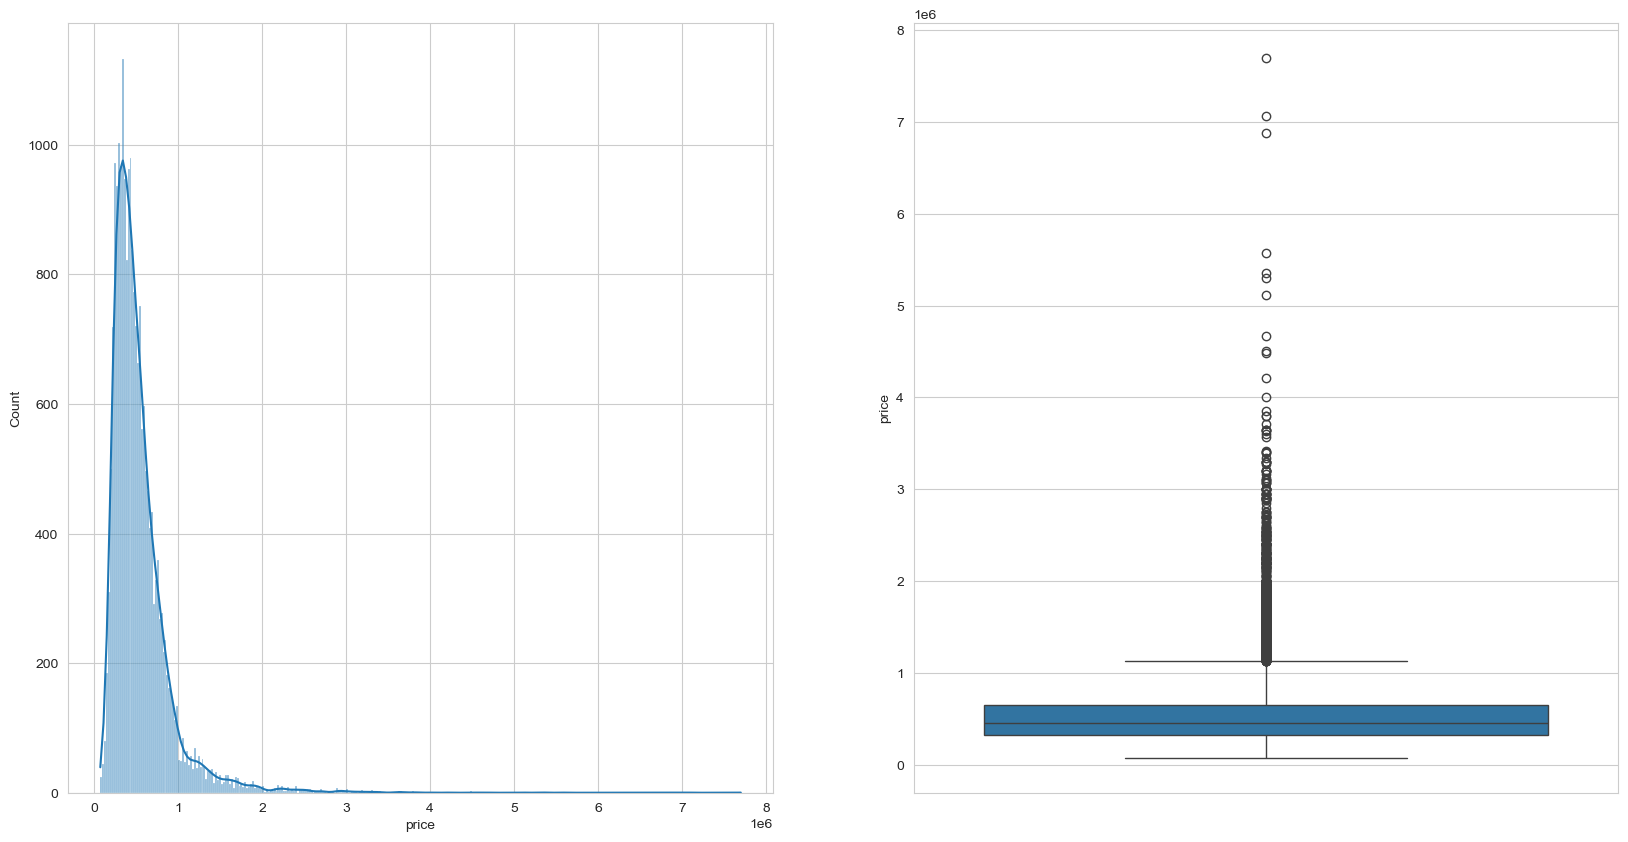

In [41]:
# Predict variable
y = df['price']
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(y, kde=True, ax=axs[0])
sns.boxplot(y, ax=axs[1])
plt.show()


The target variable is right-skewed. We'll apply the log transformation to make it normally distributed.

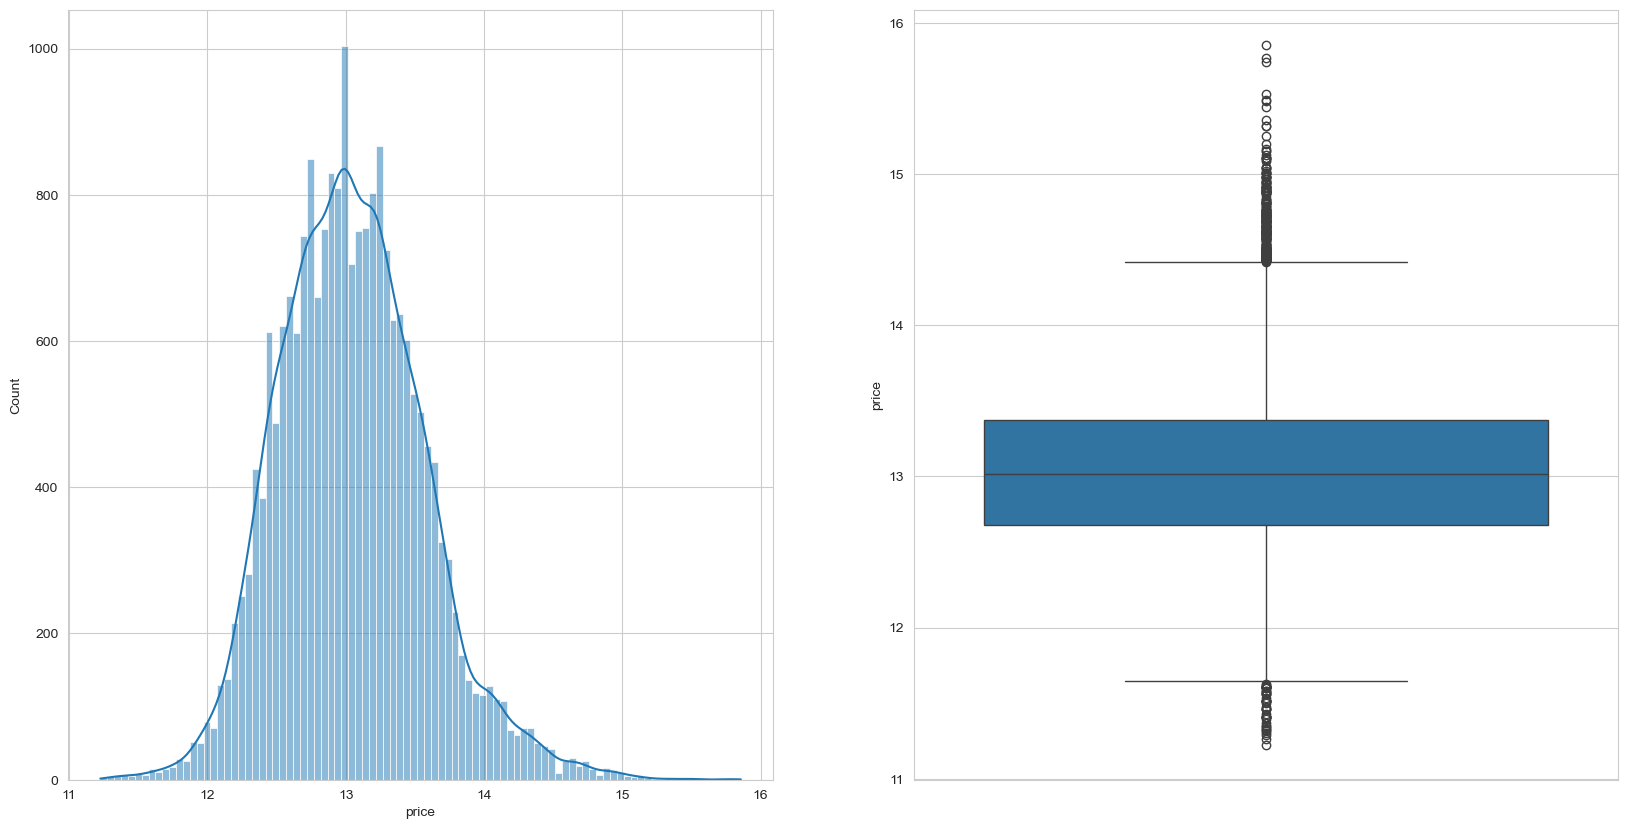

In [42]:
import numpy as np

y_log = np.log1p(y)
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(y_log, kde=True, ax=axs[0])
sns.boxplot(y_log, ax=axs[1])
plt.show()


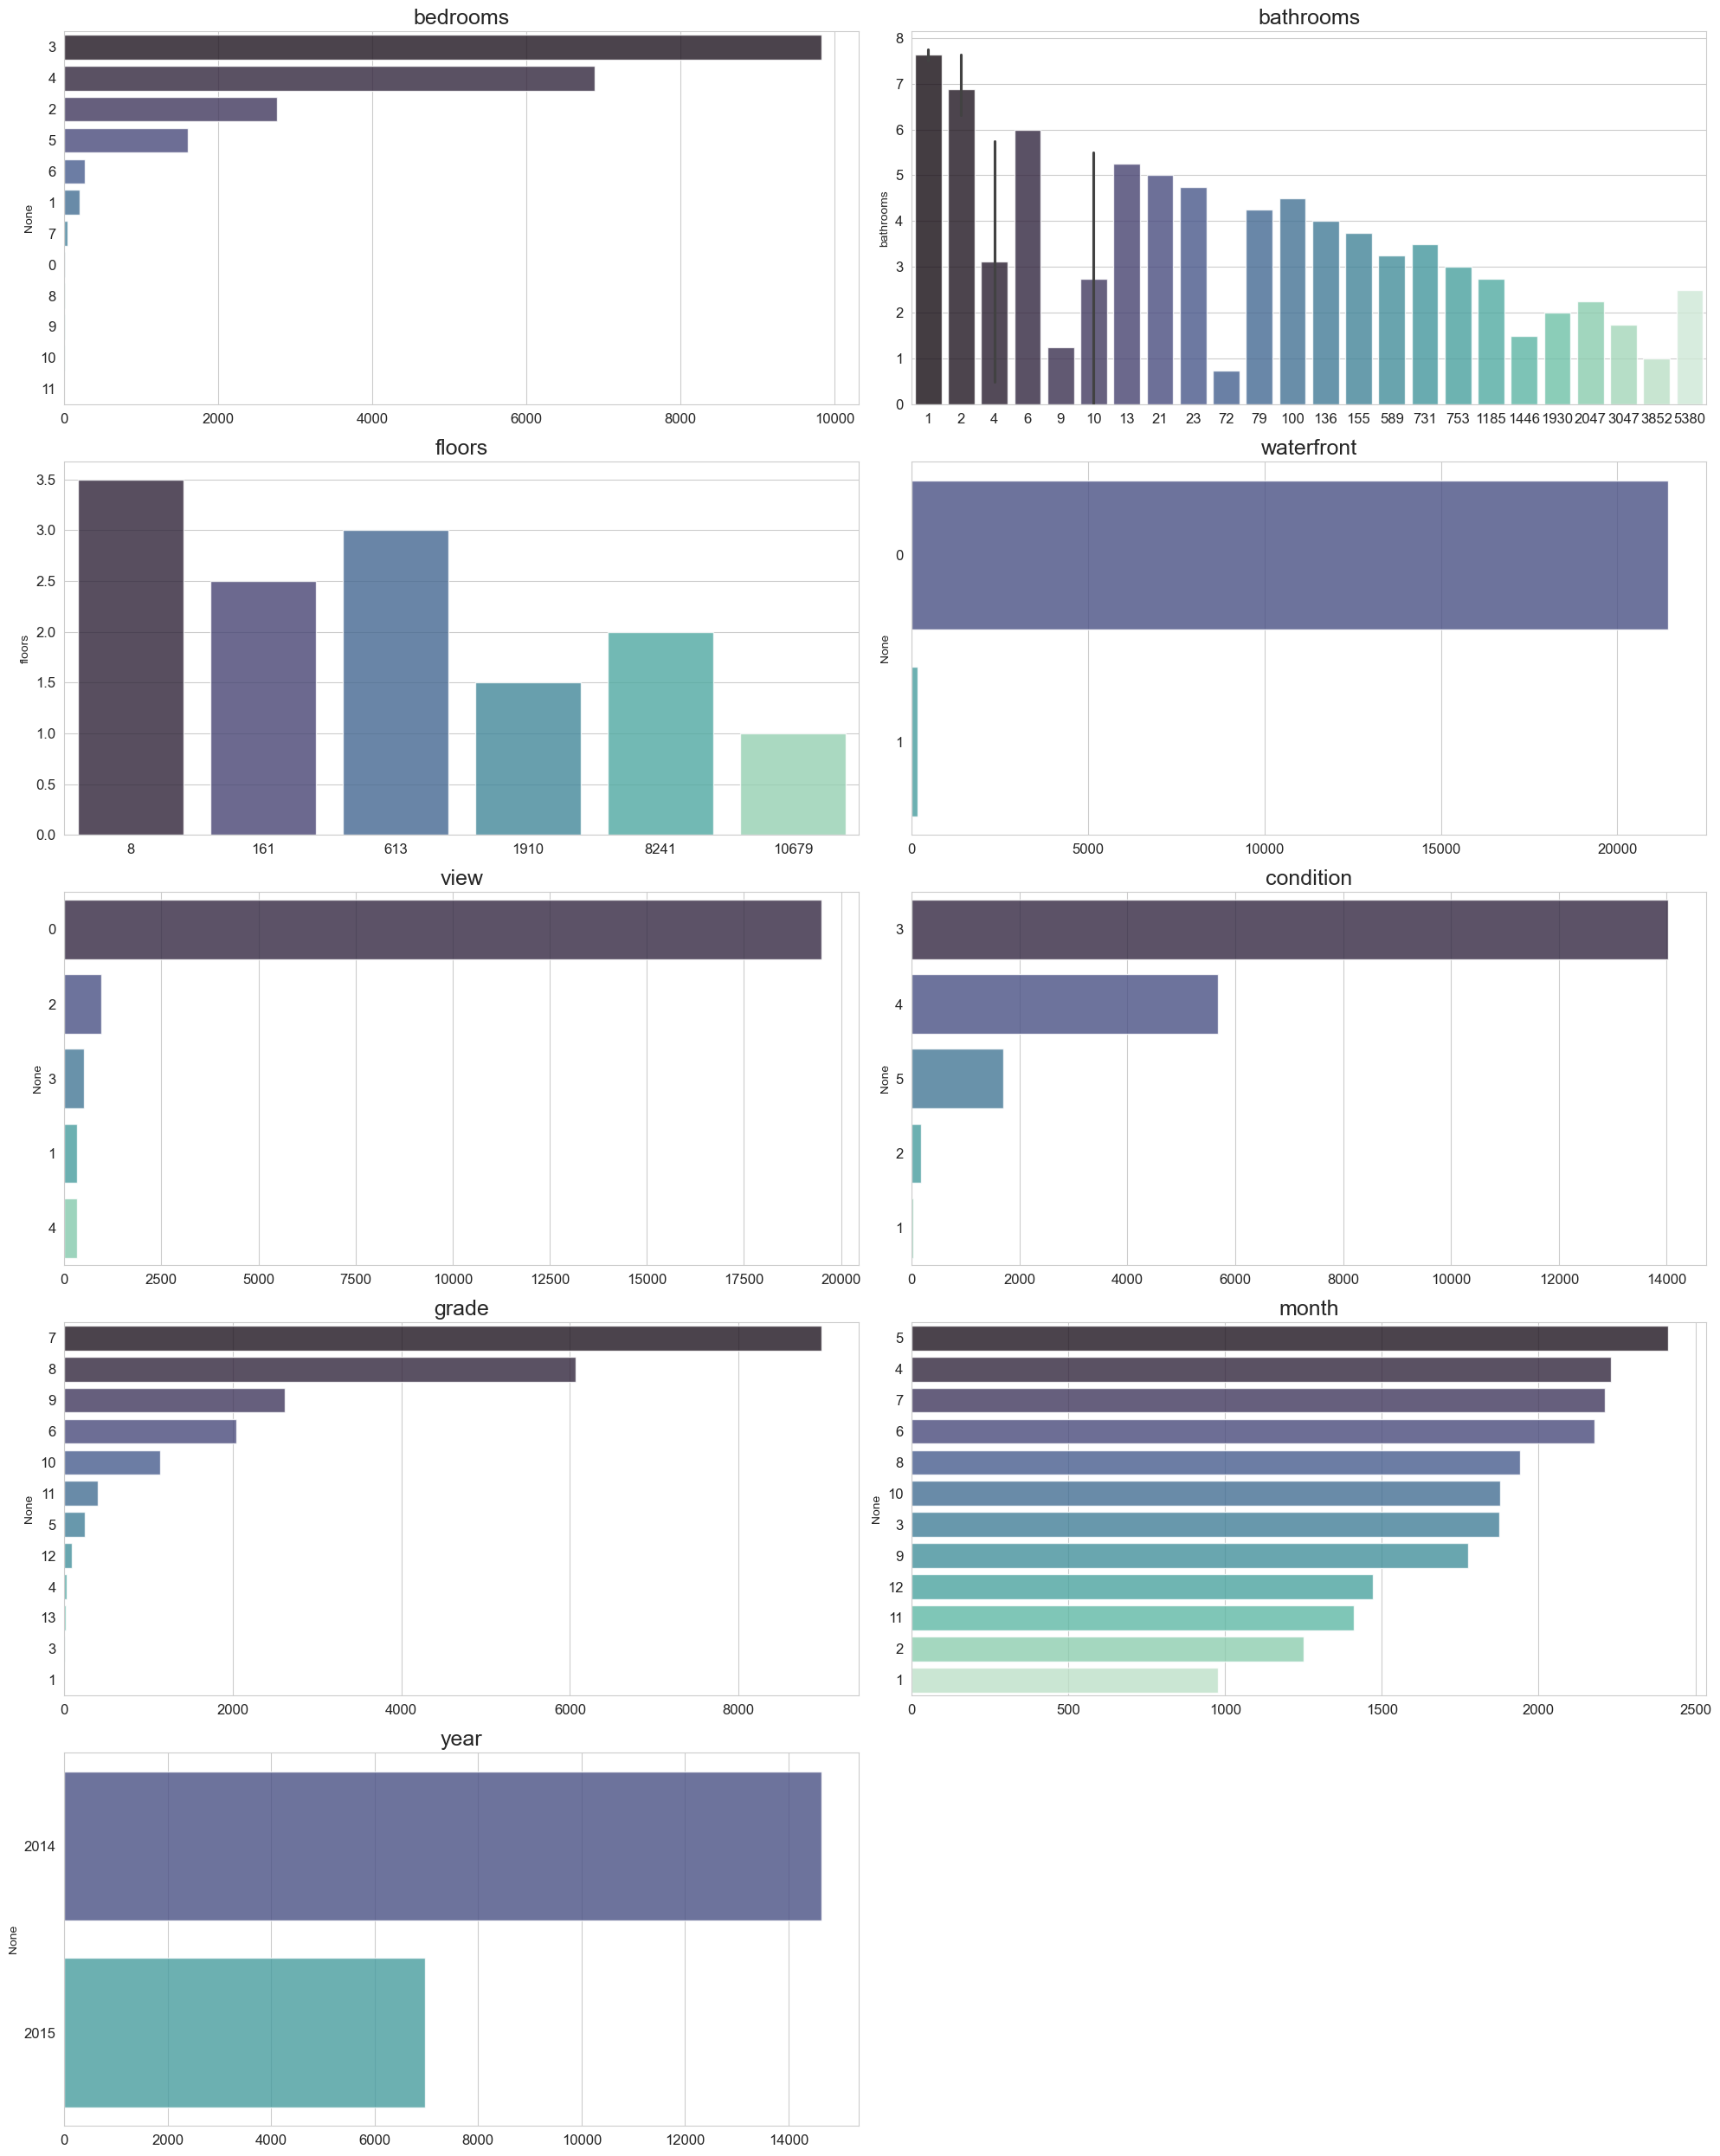

In [43]:
# Analyze categorical variables
num_plot = len(df_cat.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

if isinstance(axes, np.ndarray):
    list_axes = list(axes.flat)
else:
    list_axes = [axes]

for index, col in enumerate(df_cat.columns):
    df_count = df[col].value_counts()

    if (df_count.index.dtype == np.int64):
        df_count.index = map(str, df_count.index)

    sns.barplot(ax = list_axes[index] , x = df_count.values, y = df_count.index , alpha=0.8, palette='mako')
    list_axes[index].set_title(col, fontsize=18)
    list_axes[index].tick_params(axis="x", labelsize=12)
    list_axes[index].tick_params(axis="y", labelsize=12)

for i in range(num_plot, len(list_axes)):
    list_axes[i].set_visible(False)


fig.tight_layout()
plt.show()

In [44]:
# Frequency of categorical variables
for col in df_cat.columns:
    temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
    temp_df["frequency"] = round(temp_df["counts"]/len(df) * 100, 2)
    print(temp_df)

    bedrooms  counts  frequency
0          3    9824      45.46
1          4    6882      31.84
2          2    2760      12.77
3          5    1601       7.41
4          6     272       1.26
5          1     199       0.92
6          7      38       0.18
7          0      13       0.06
8          8      13       0.06
9          9       6       0.03
10        10       3       0.01
11        11       1       0.00
    bathrooms  counts  frequency
0        2.50    5380      24.89
1        1.00    3852      17.82
2        1.75    3047      14.10
3        2.25    2047       9.47
4        2.00    1930       8.93
5        1.50    1446       6.69
6        2.75    1185       5.48
7        3.00     753       3.48
8        3.50     731       3.38
9        3.25     589       2.73
10       3.75     155       0.72
11       4.00     136       0.63
12       4.50     100       0.46
13       4.25      79       0.37
14       0.75      72       0.33
15       4.75      23       0.11
16       5.00      21  

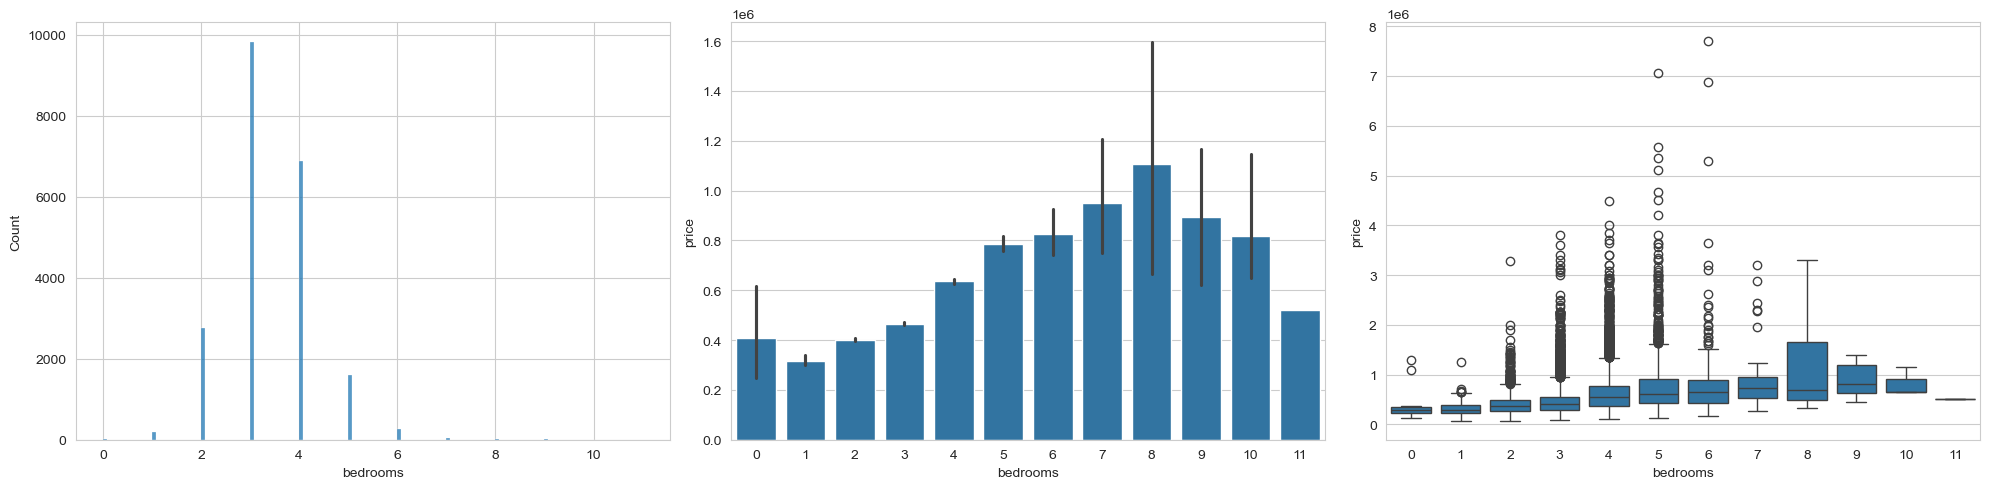

In [45]:
# About bedrooms
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='bedrooms', data=df, ax=axs[0])
sns.barplot(x='bedrooms', y='price', data=df, ax=axs[1])
sns.boxplot(x='bedrooms', y='price', data=df, ax=axs[2])
plt.tight_layout()

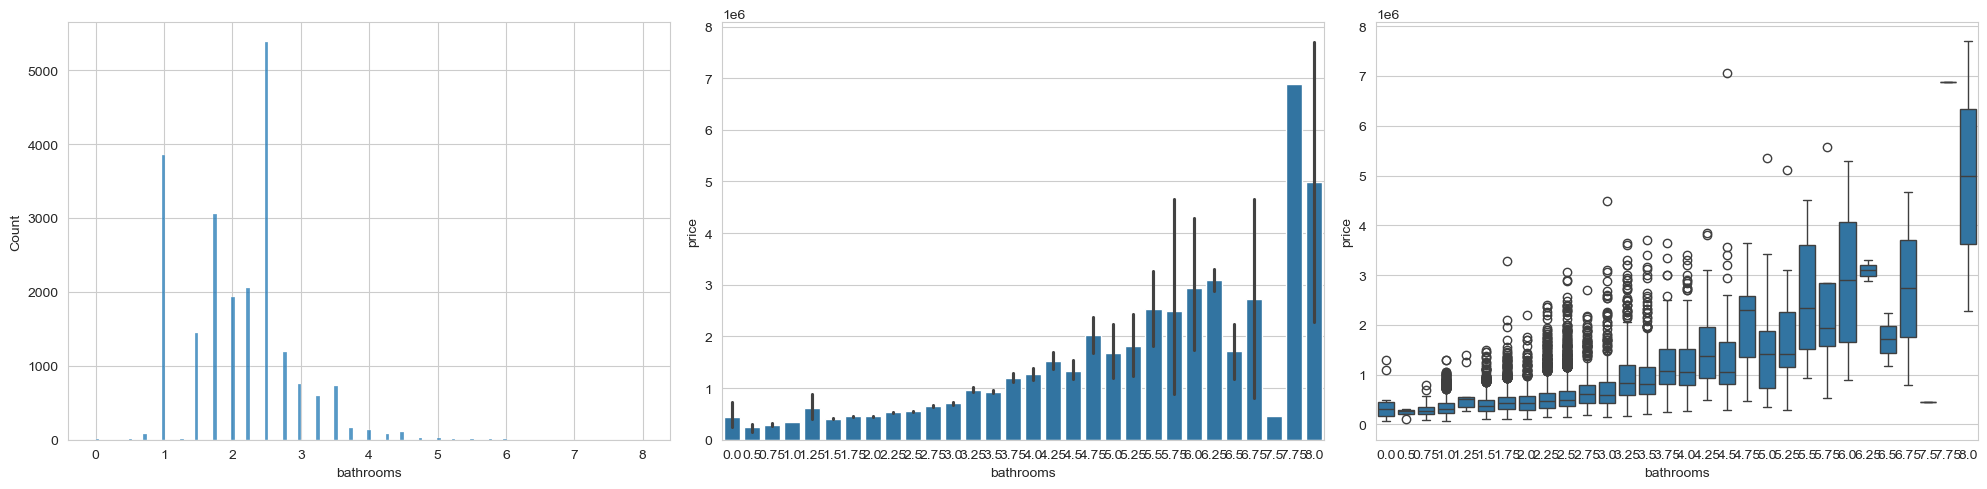

In [46]:
# About bathrooms
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='bathrooms', data=df, ax=axs[0])
sns.barplot(x='bathrooms', y='price', data=df, ax=axs[1])
sns.boxplot(x='bathrooms', y='price', data=df, ax=axs[2])
plt.tight_layout()

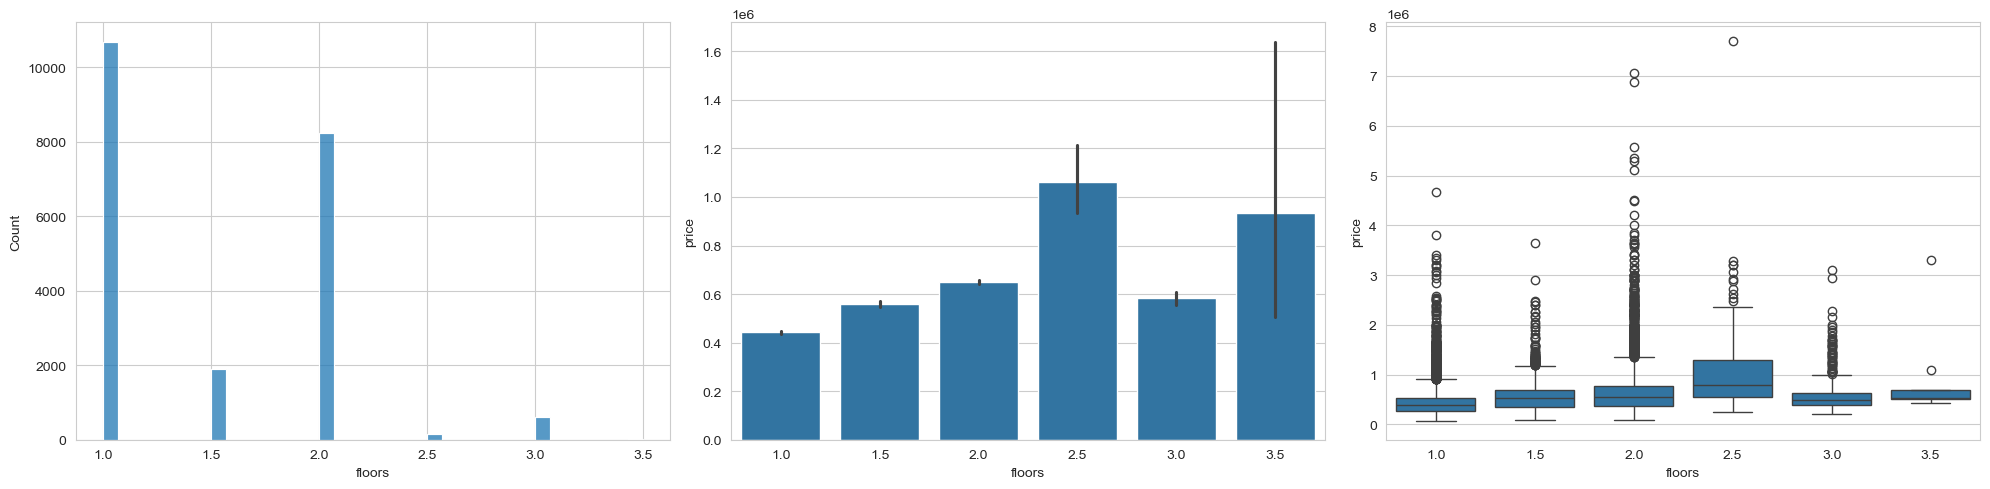

In [47]:
# About floors
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='floors', data=df, ax=axs[0])
sns.barplot(x='floors', y='price', data=df, ax=axs[1])
sns.boxplot(x='floors', y='price', data=df, ax=axs[2])
plt.tight_layout()

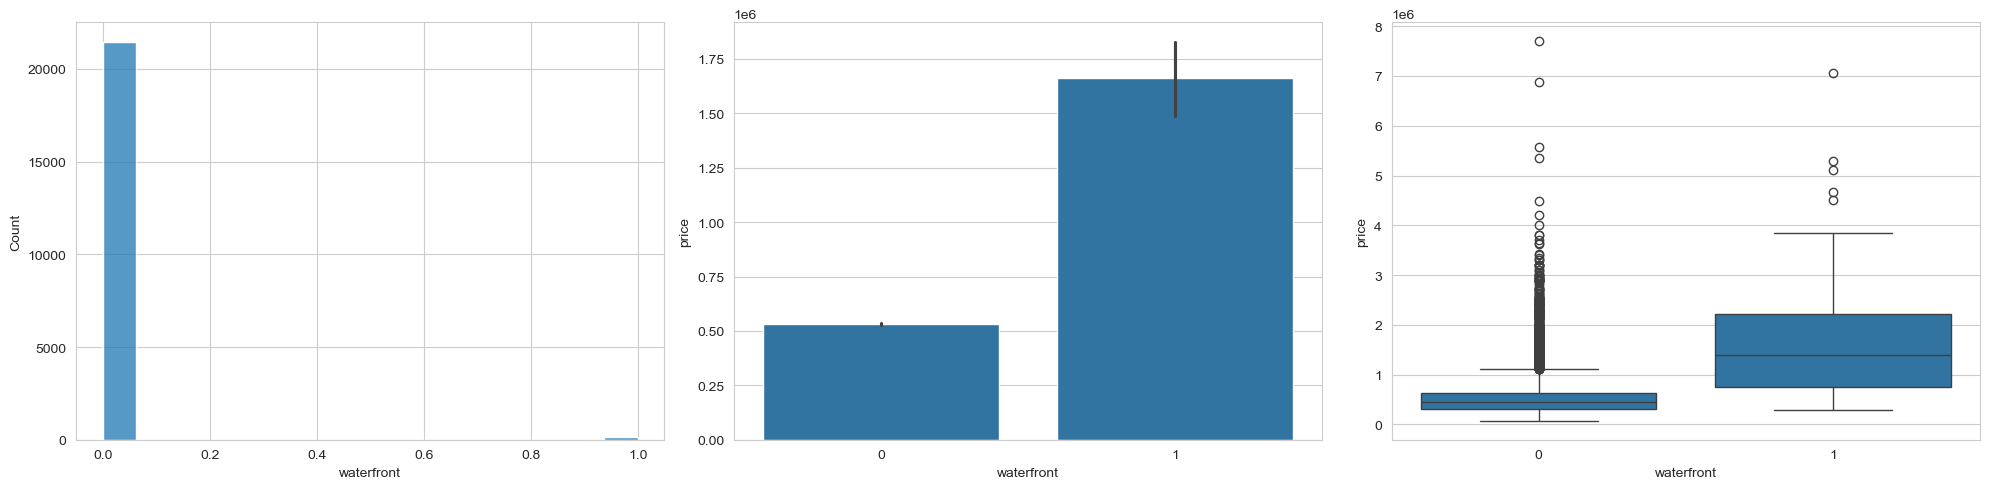

In [48]:
# About waterfront
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='waterfront', data=df, ax=axs[0])
sns.barplot(x='waterfront', y='price', data=df, ax=axs[1])
sns.boxplot(x='waterfront', y='price', data=df, ax=axs[2])
plt.tight_layout()

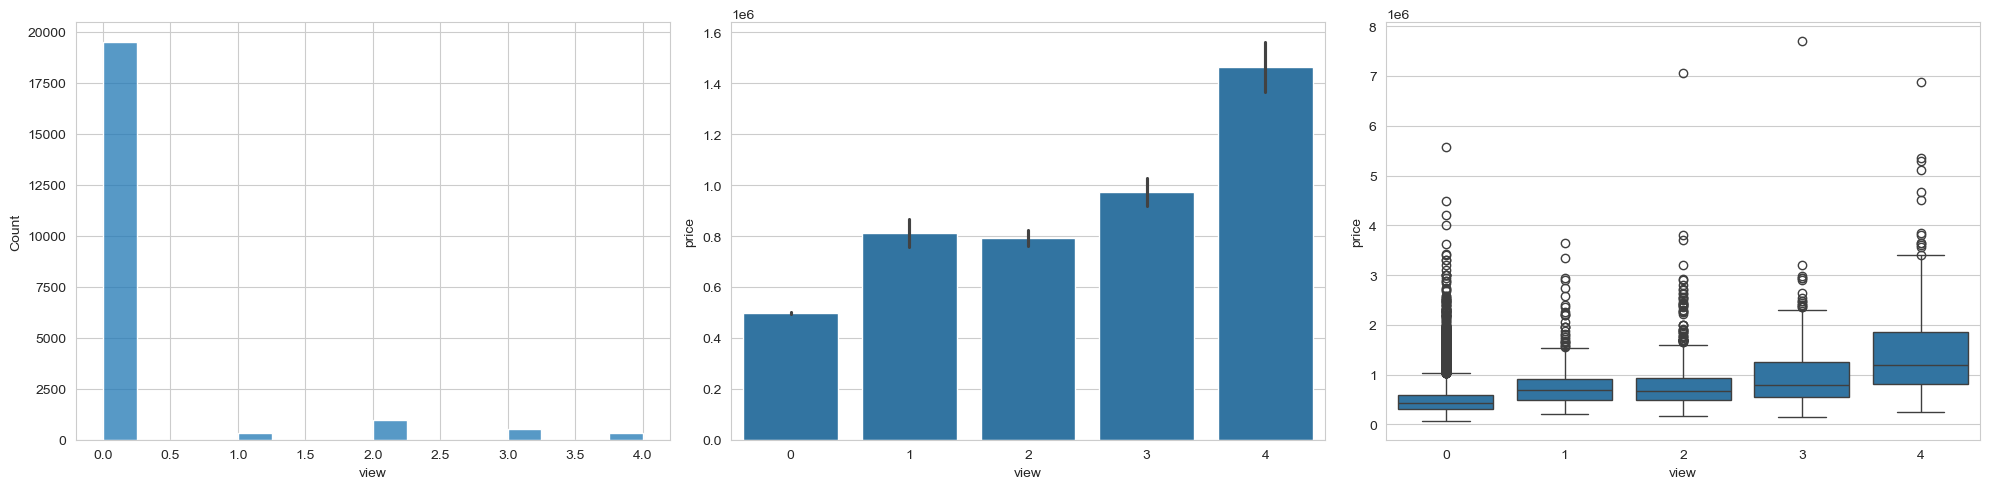

In [49]:
# About view
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='view', data=df, ax=axs[0])
sns.barplot(x='view', y='price', data=df, ax=axs[1])
sns.boxplot(x='view', y='price', data=df, ax=axs[2])
plt.tight_layout()

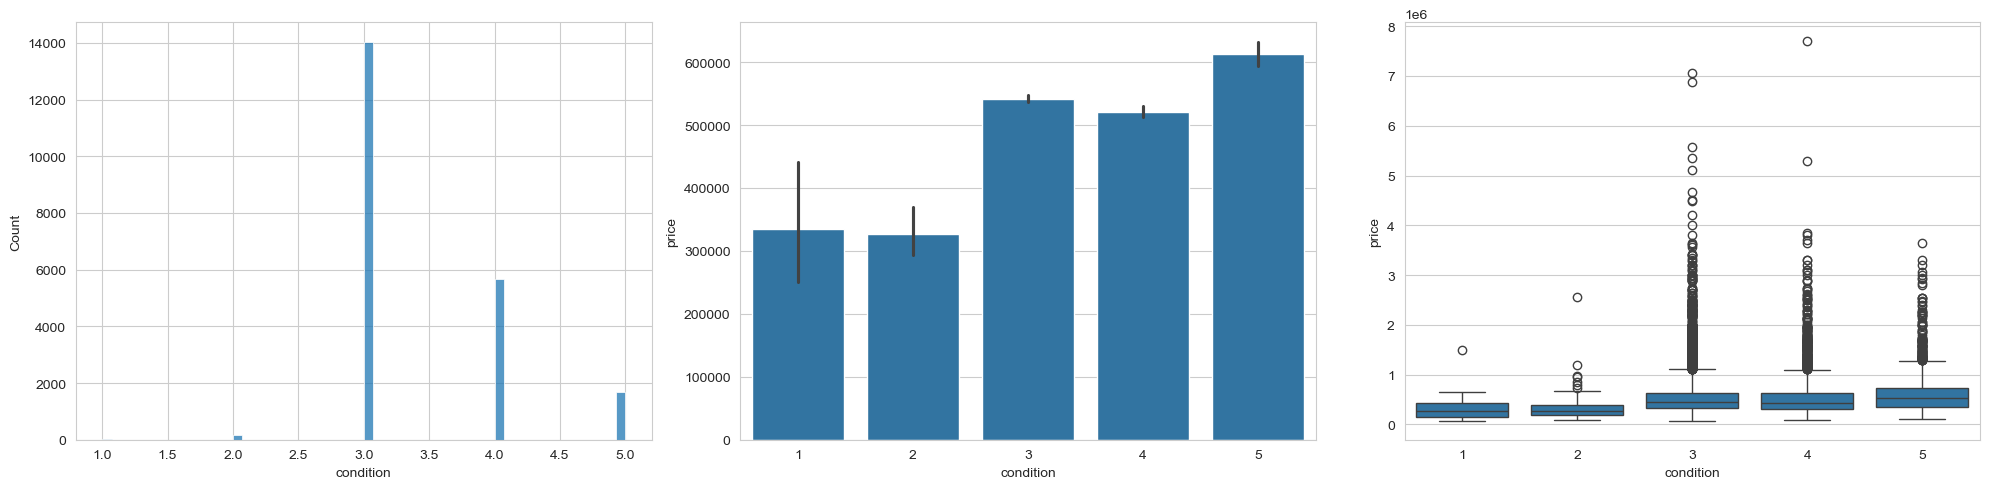

In [50]:
# About condition
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='condition', data=df, ax=axs[0])
sns.barplot(x='condition', y='price', data=df, ax=axs[1])
sns.boxplot(x='condition', y='price', data=df, ax=axs[2])
plt.tight_layout()

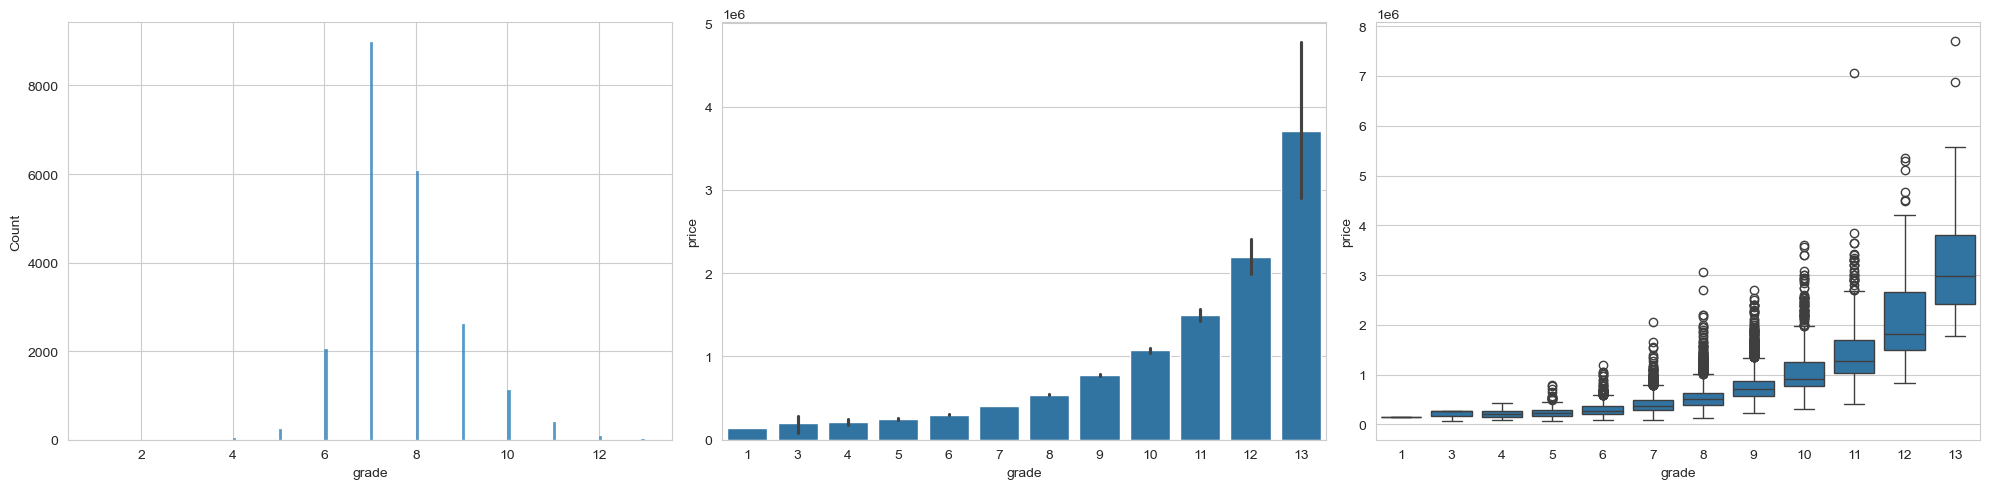

In [51]:
# About grade
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='grade', data=df, ax=axs[0])
sns.barplot(x='grade', y='price', data=df, ax=axs[1])
sns.boxplot(x='grade', y='price', data=df, ax=axs[2])
plt.tight_layout()

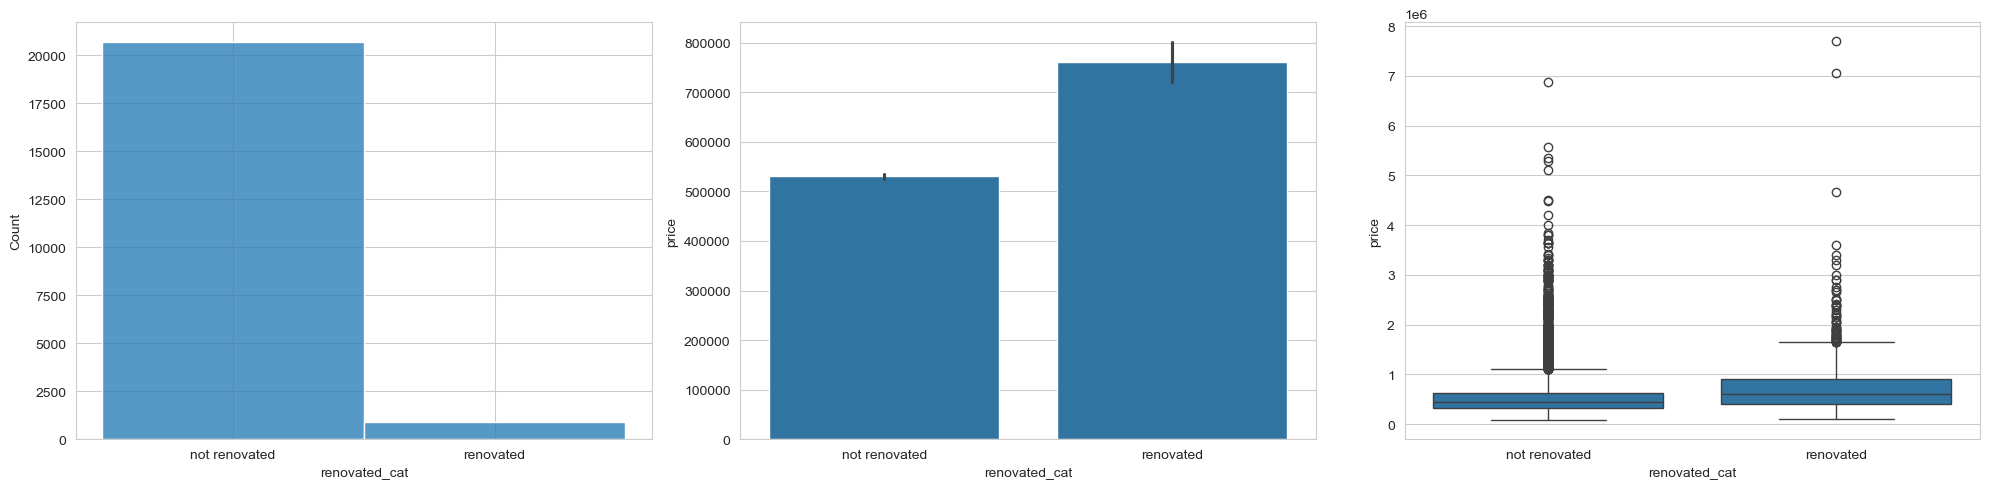

In [52]:
# About renovated
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='renovated_cat', data=df, ax=axs[0])
sns.barplot(x='renovated_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='renovated_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

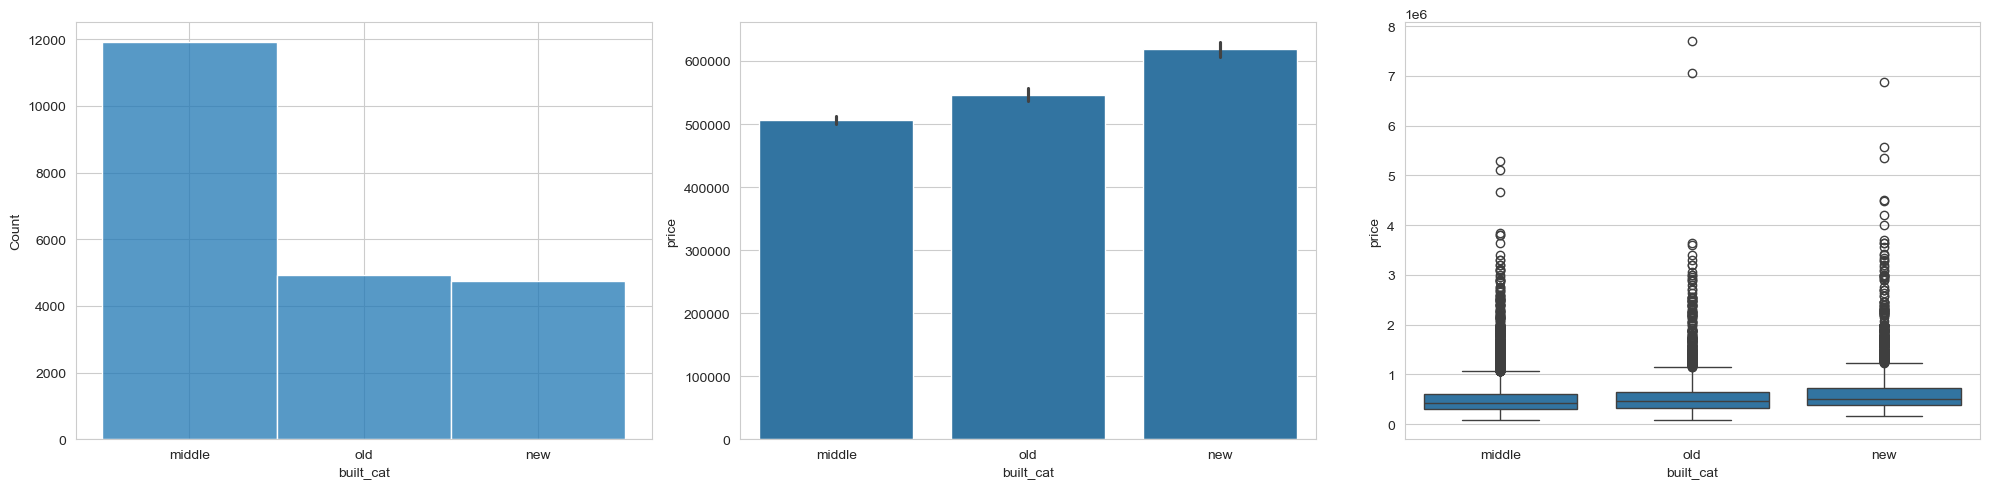

In [53]:
# About built
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='built_cat', data=df, ax=axs[0])
sns.barplot(x='built_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='built_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

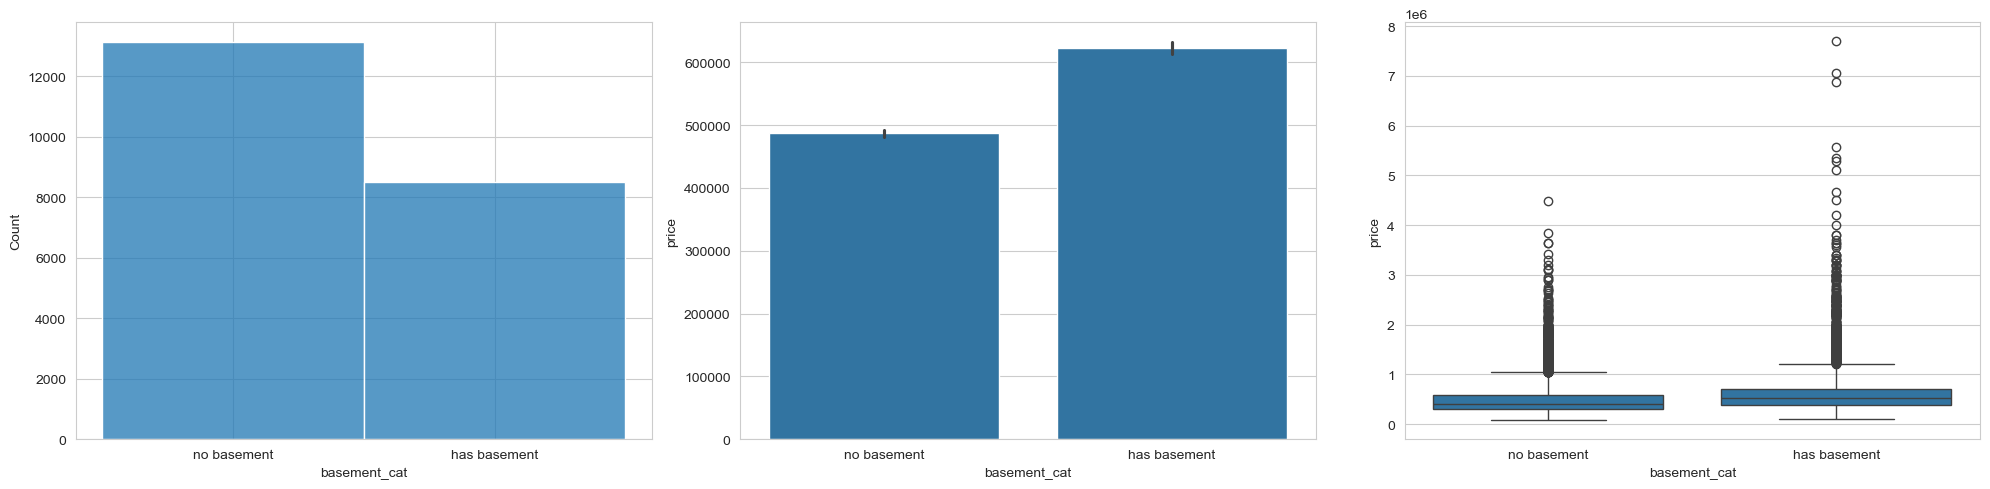

In [54]:
# About basement
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='basement_cat', data=df, ax=axs[0])
sns.barplot(x='basement_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='basement_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

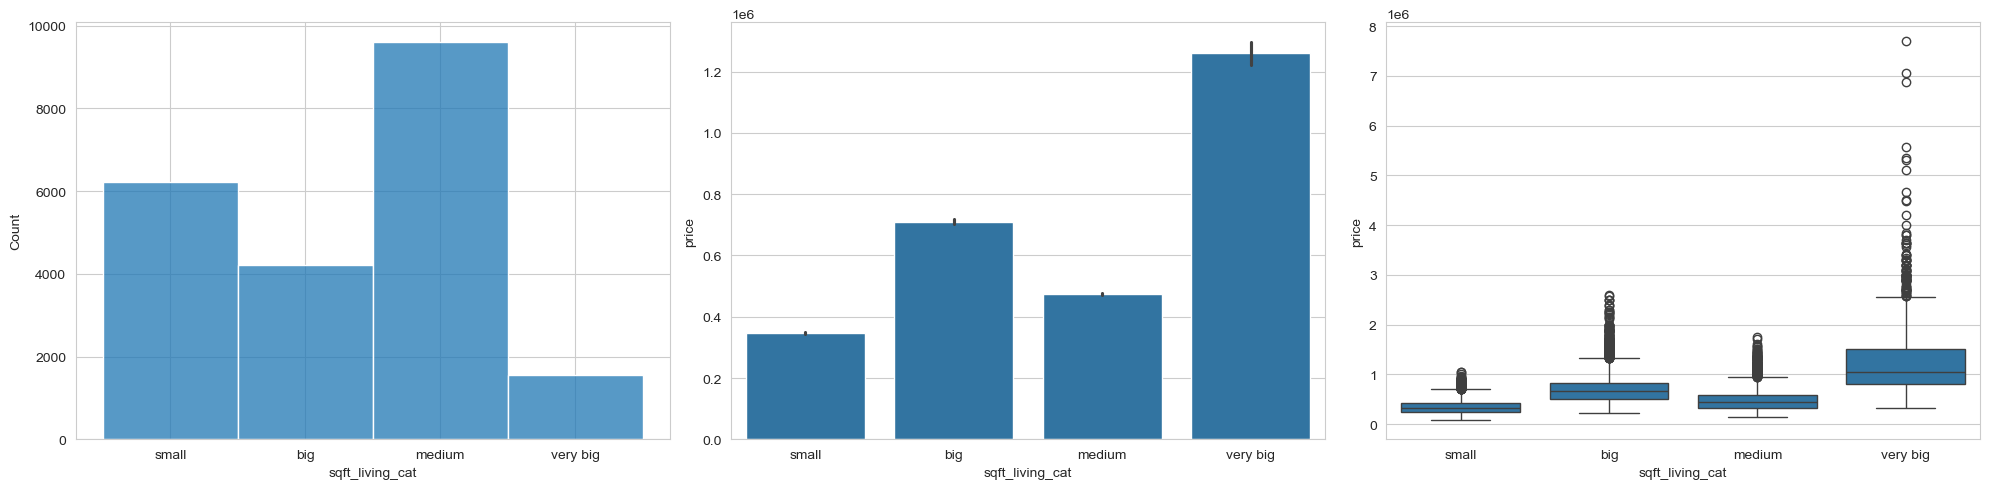

In [55]:
# About sqft_living_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_living_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_living_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_living_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

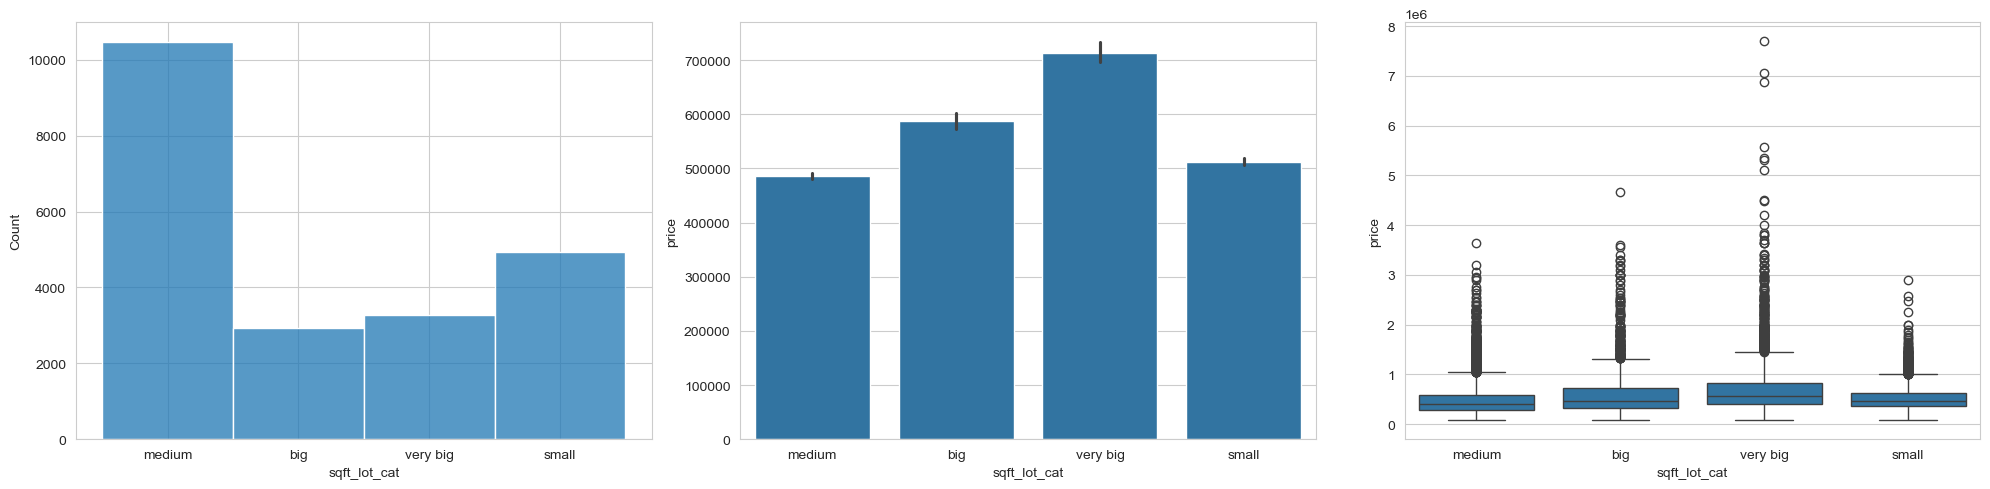

In [56]:
# About sqft_lot_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_lot_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_lot_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_lot_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

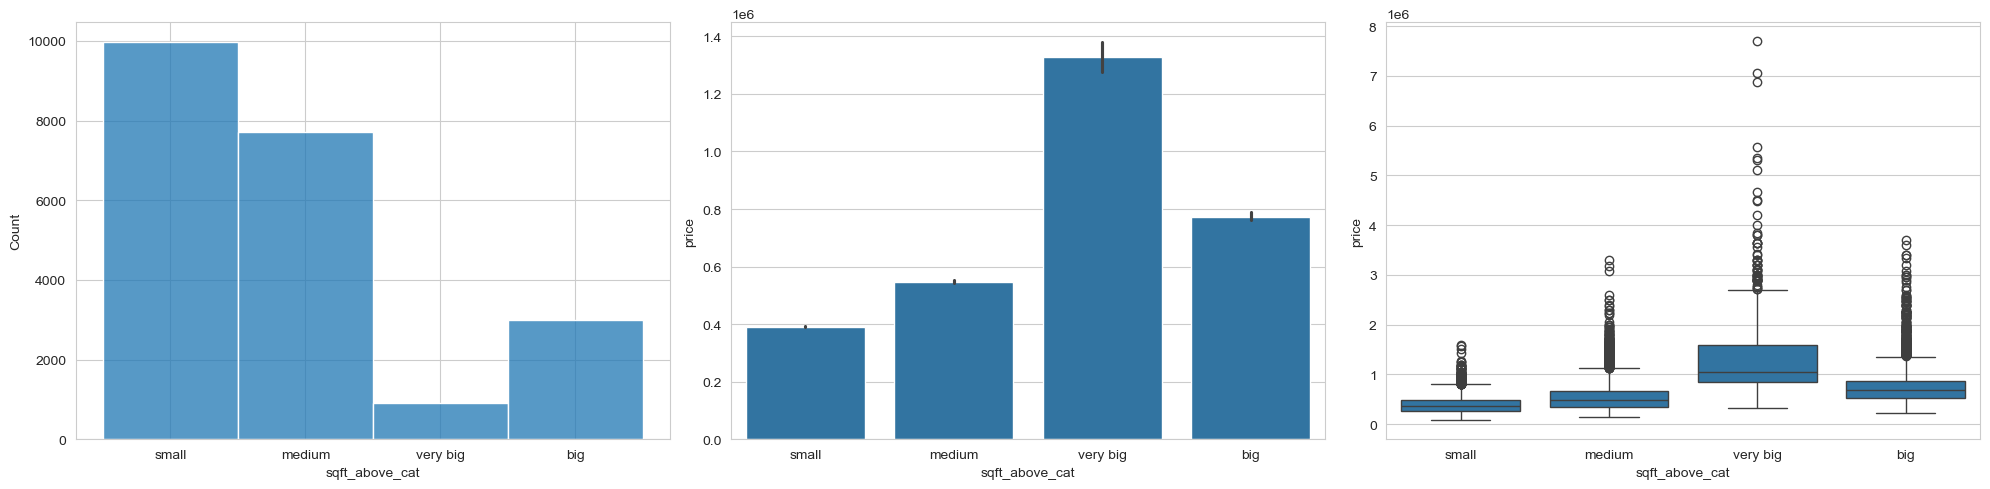

In [57]:
# About sqft_above_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_above_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_above_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_above_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

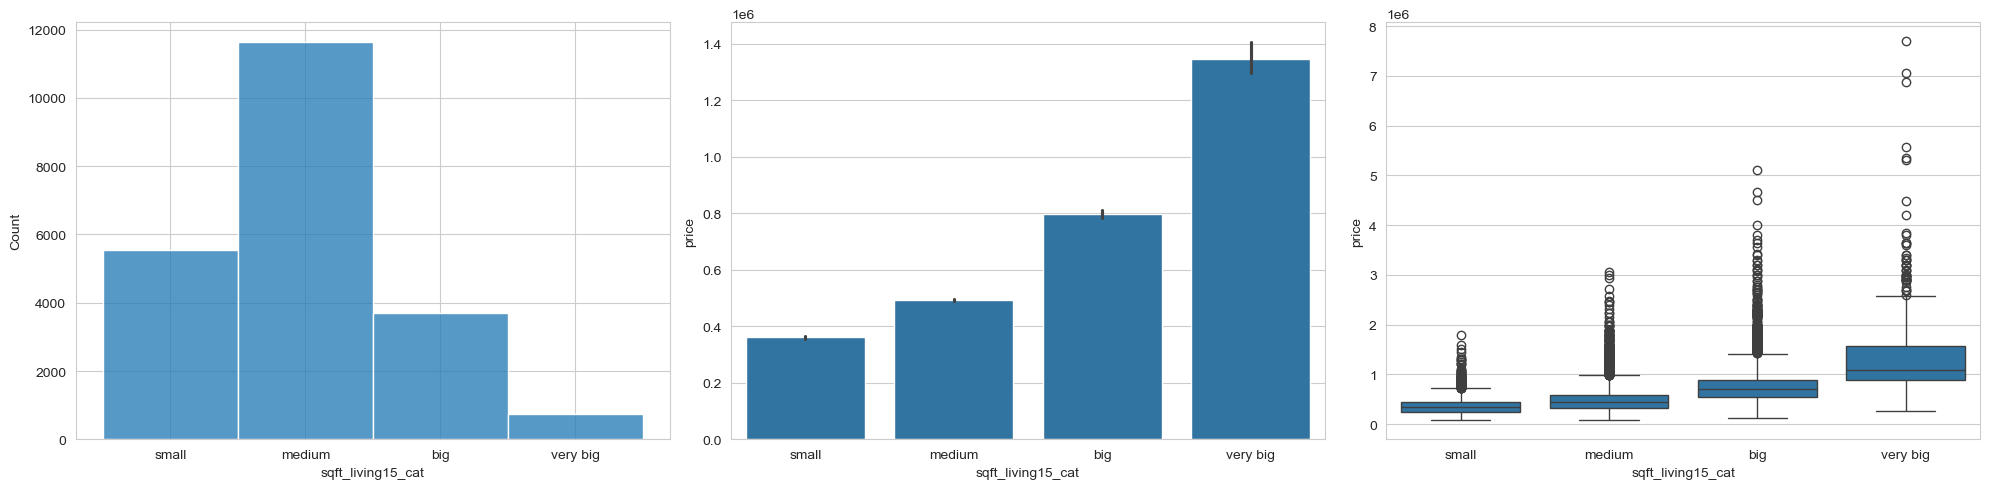

In [58]:
# About sqft_living15_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_living15_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_living15_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_living15_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

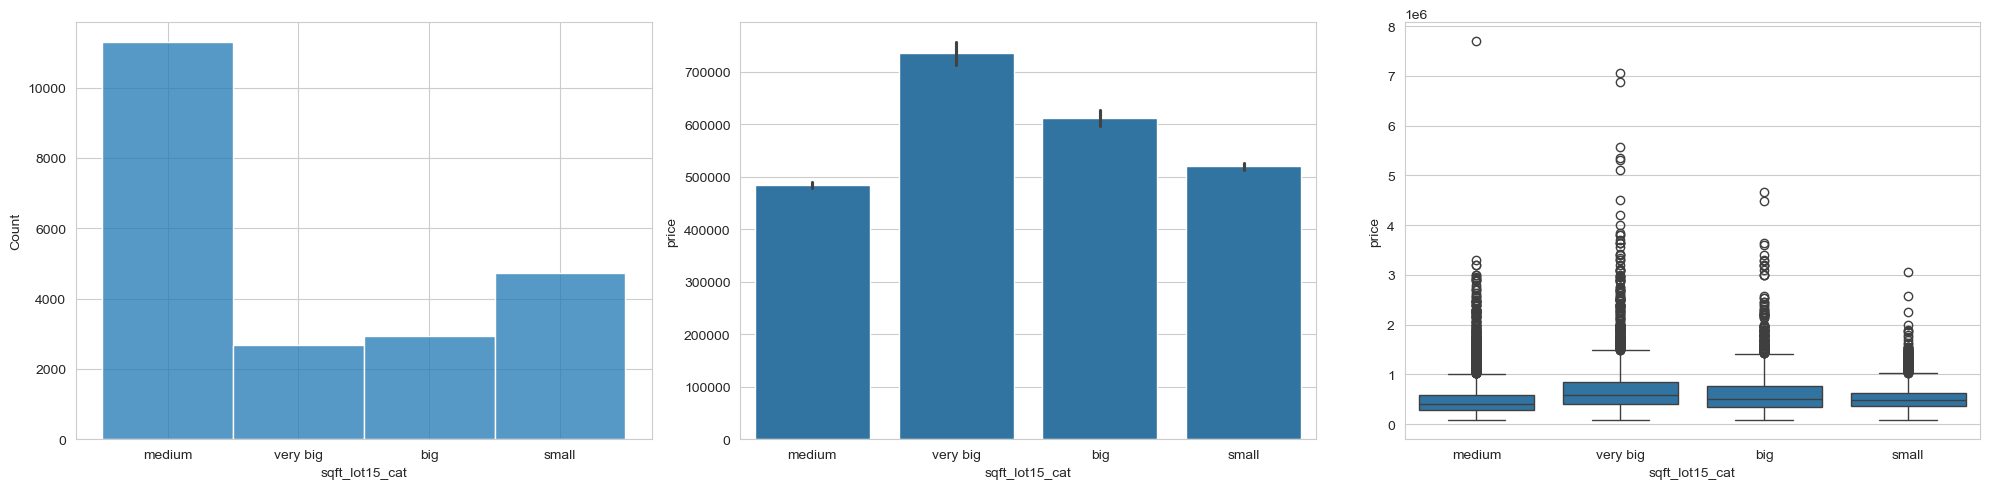

In [59]:
# About sqft_lot15_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_lot15_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_lot15_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_lot15_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

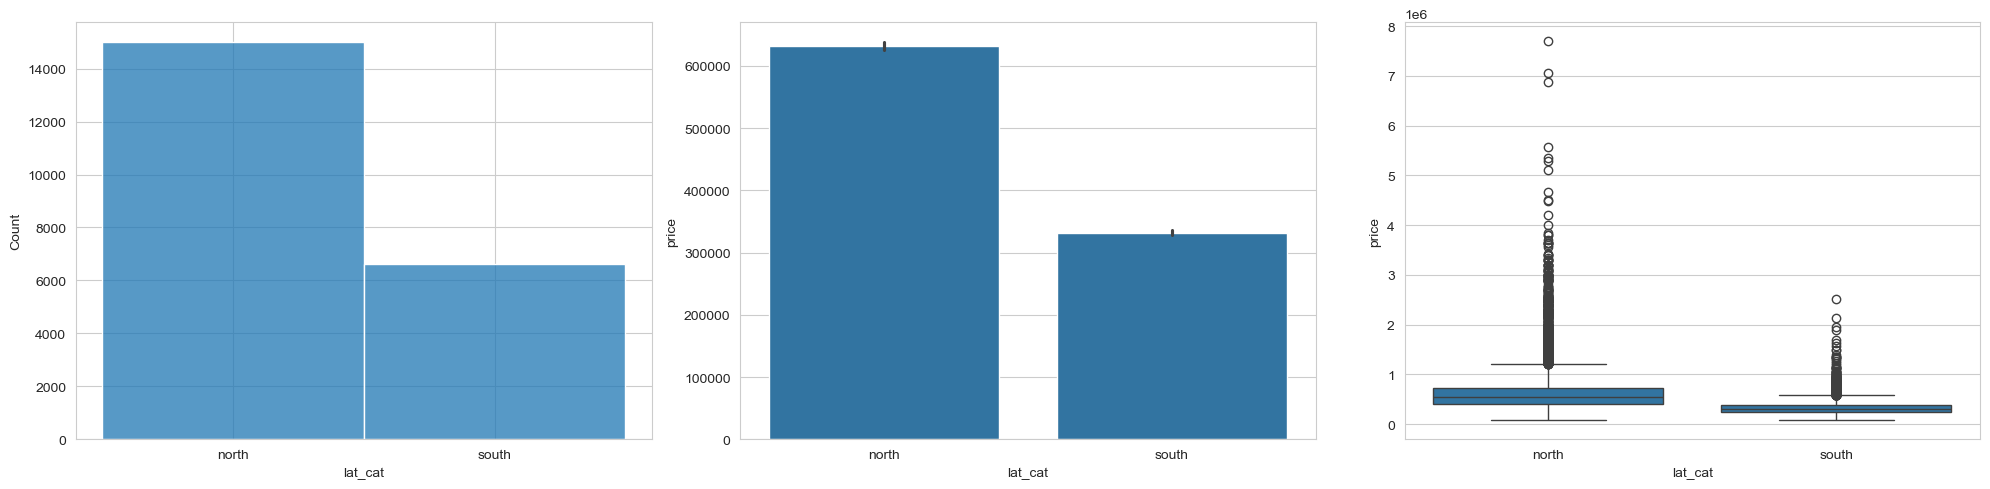

In [60]:
# About lat_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='lat_cat', data=df, ax=axs[0])
sns.barplot(x='lat_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='lat_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

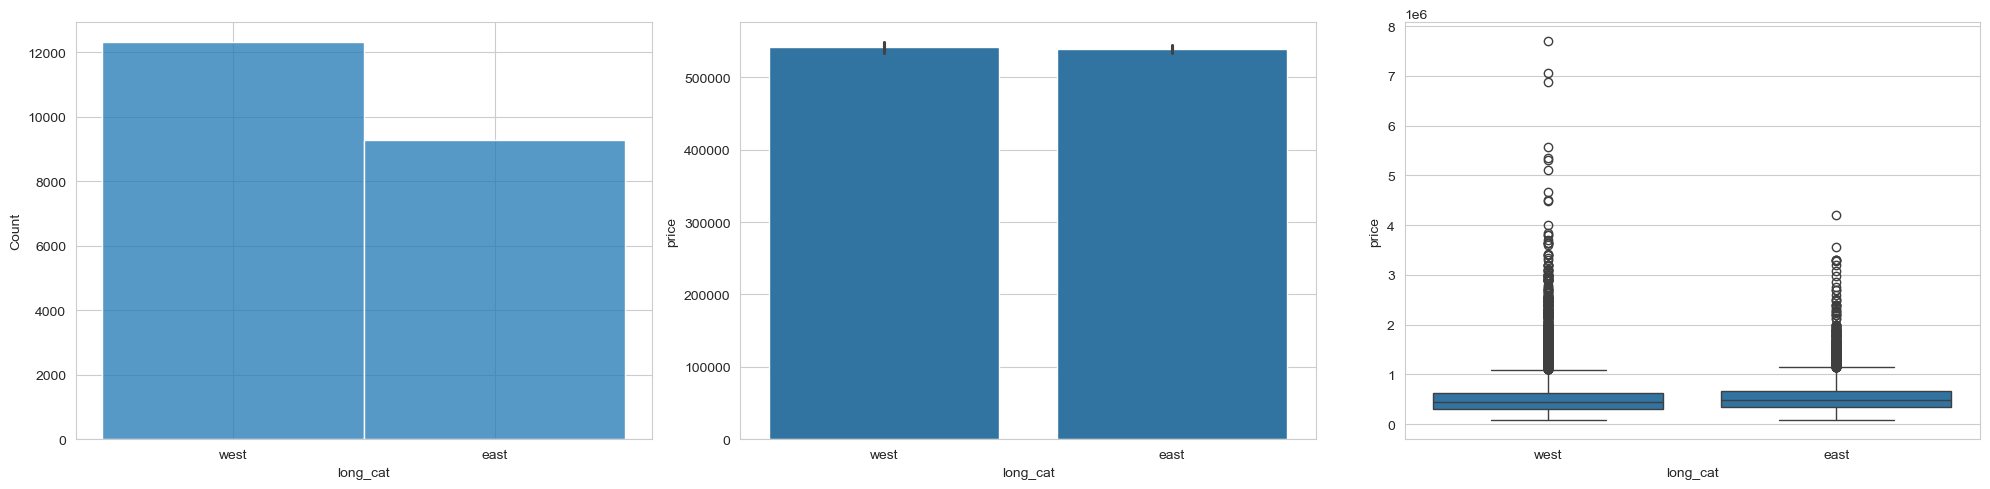

In [61]:
# About long_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='long_cat', data=df, ax=axs[0])
sns.barplot(x='long_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='long_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

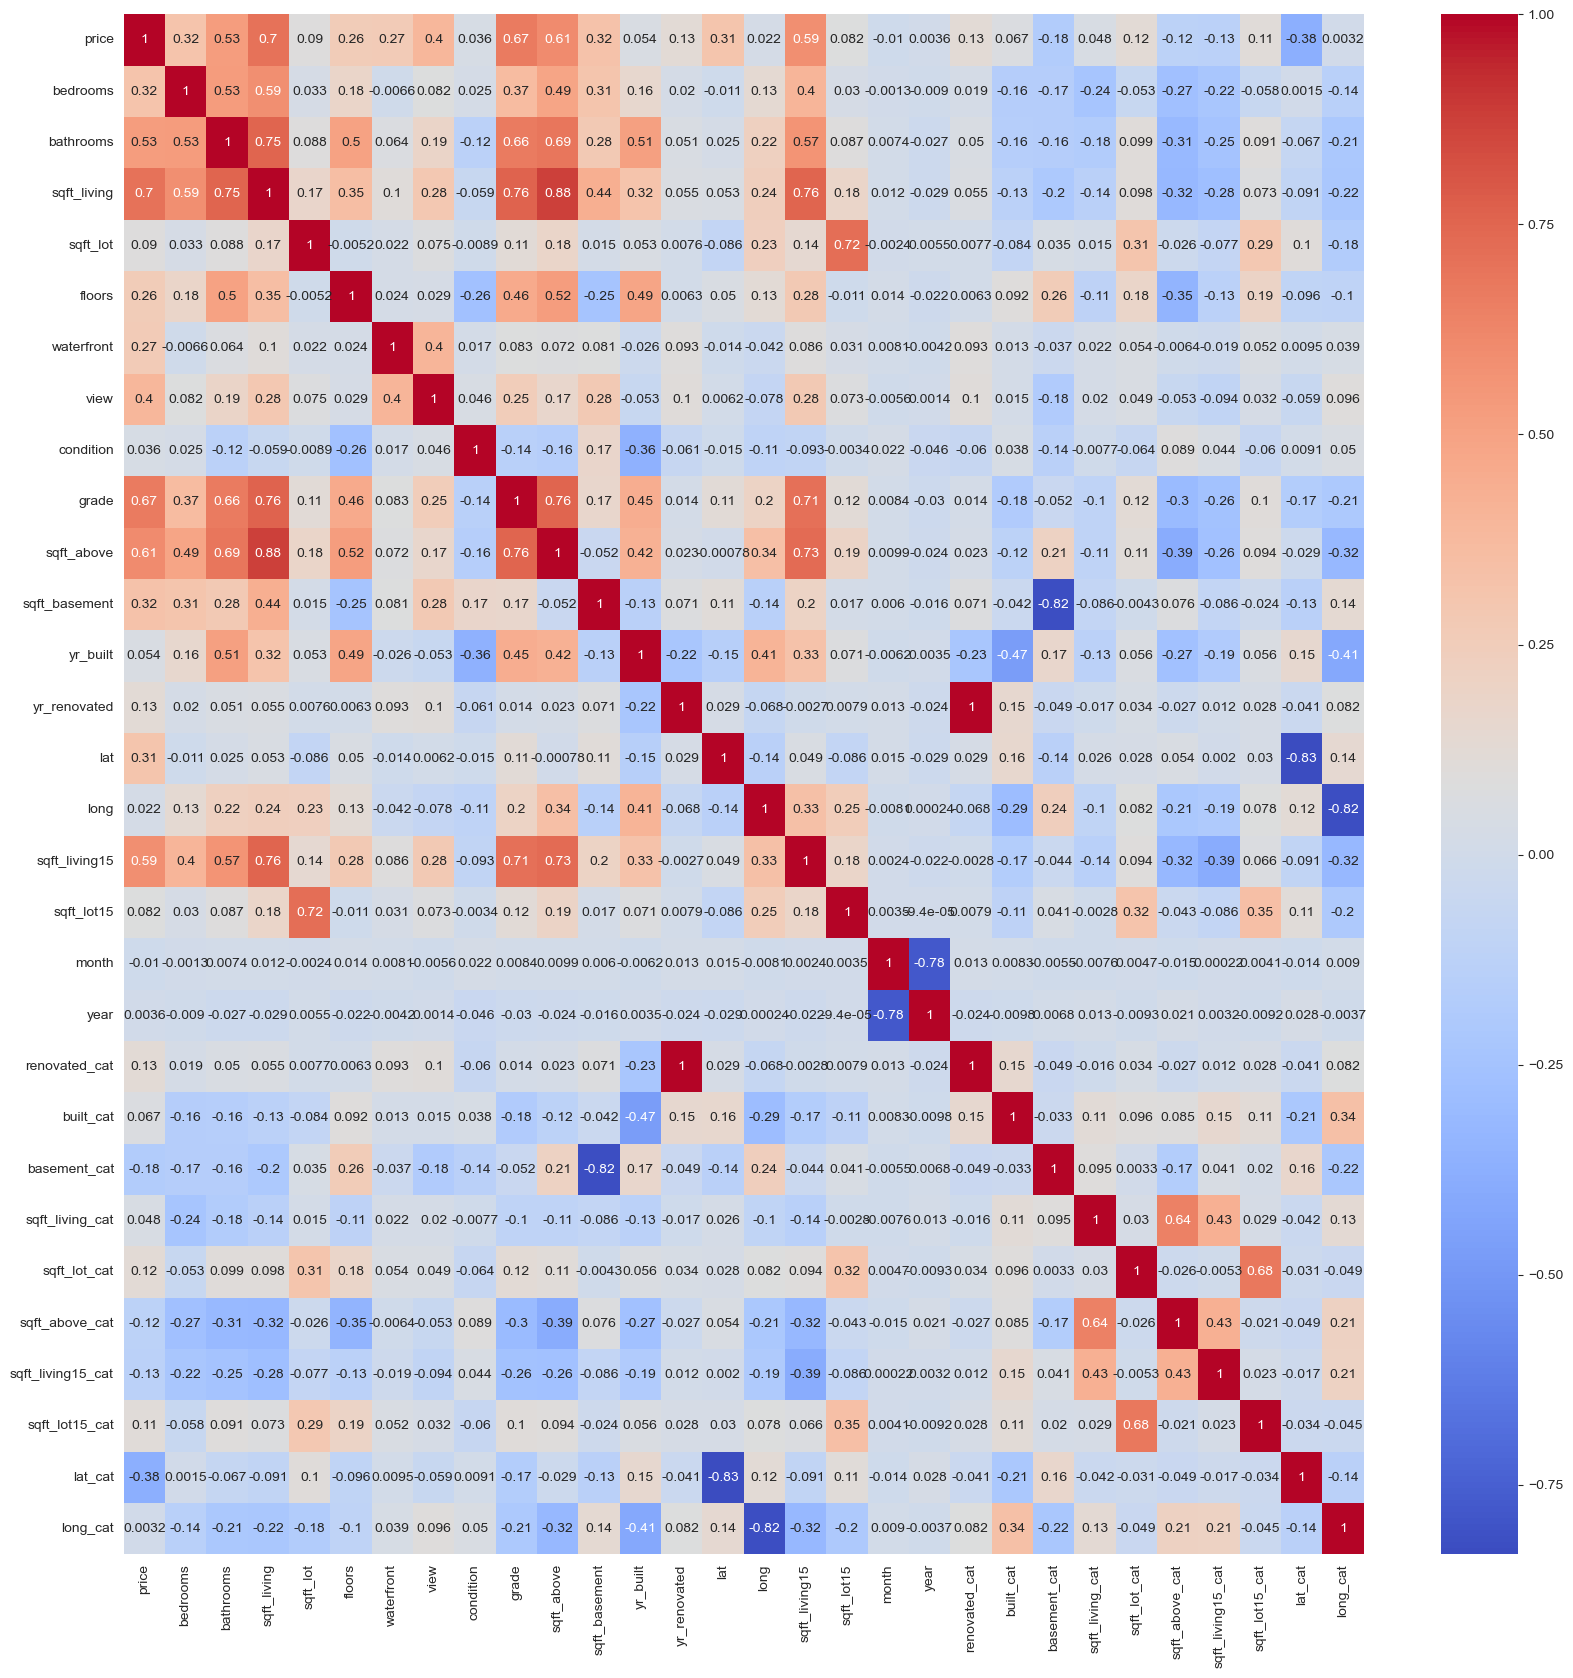

In [62]:
from sklearn.preprocessing import LabelEncoder

df_transform = df.copy()
df_cat = df.select_dtypes(include=['object'])

label = LabelEncoder()
for col in df_cat.columns:
    df_transform[col] = label.fit_transform(df_transform[col])

plt.figure(figsize=(20, 20))
corr_matrix = df_transform.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

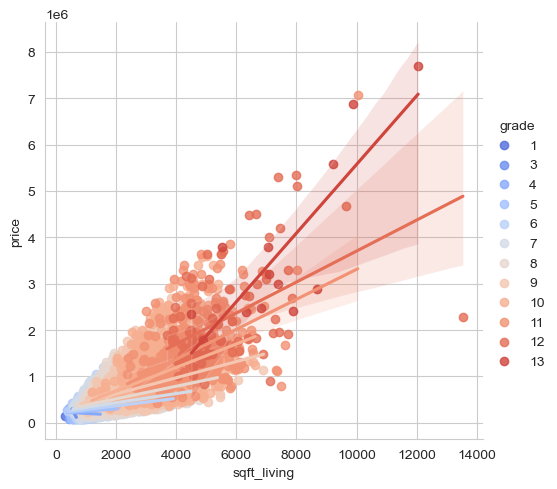

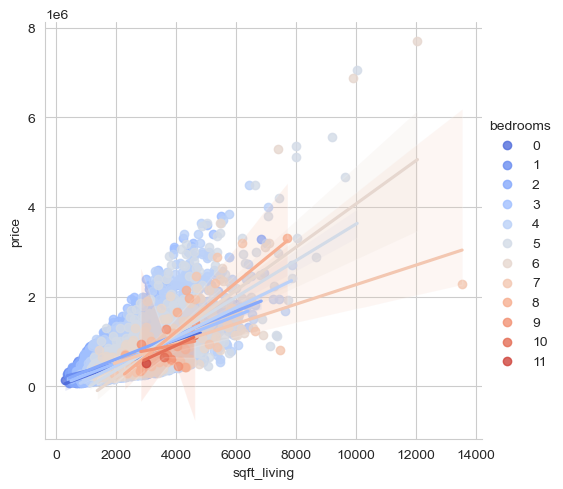

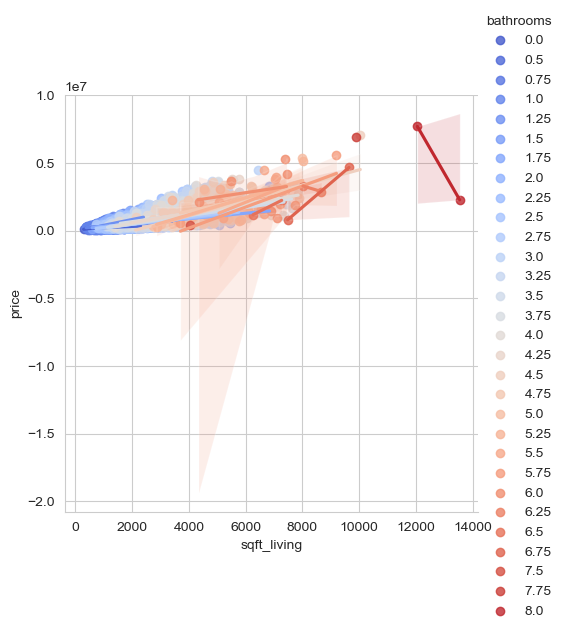

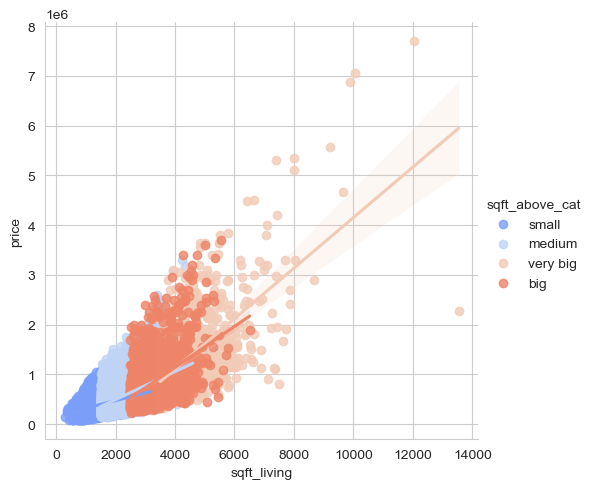

In [63]:
# sqft_living, bedrooms, bathrooms, sqft_above, grade are highly correlated with price
sns.lmplot(x='sqft_living', y='price', data=df, hue='grade', palette='coolwarm')

sns.lmplot(x='sqft_living', y='price', data=df, hue='bedrooms', palette='coolwarm')

sns.lmplot(x='sqft_living', y='price', data=df, hue='bathrooms', palette='coolwarm')

sns.lmplot(x='sqft_living', y='price', data=df, hue='sqft_above_cat', palette='coolwarm')


In [64]:
from sklearn.model_selection import train_test_split

category_names = ['waterfront', 'view', 'condition', 'grade', 'renovated_cat', 'built_cat', 'basement_cat', 'sqft_living_cat', 'sqft_lot_cat', 'sqft_above_cat', 'sqft_living15_cat', 'sqft_lot15_cat', 'lat_cat', 'long_cat']
df[category_names] = df[category_names].astype('category')
# transform all category data to object
df[category_names] = df[category_names].apply(lambda x: x.astype('object'))

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,built_cat,basement_cat,sqft_living_cat,sqft_lot_cat,sqft_above_cat,sqft_living15_cat,sqft_lot15_cat,lat_cat,long_cat,price
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,...,middle,no basement,medium,big,medium,big,big,south,east,325000.0
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,...,old,has basement,small,small,small,small,medium,north,west,257000.0
17615,3,2.50,1990,7577,2.0,0,0,3,7,1990,...,middle,no basement,medium,medium,medium,medium,medium,south,west,293000.0
16971,3,1.75,1350,9793,1.0,0,0,4,7,1350,...,middle,no basement,small,medium,small,medium,medium,south,east,225000.0
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,...,new,has basement,medium,small,small,medium,big,north,west,479000.0


In [72]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clf_names = ["LinearRegression", "RidgeRegression", "KNeighborsRegressor", "DecisionTreeRegressor", "RandomForestRegressor"]
clfs = [LinearRegression(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

sc_names = ["StandardScaler", "MinMaxScaler", "Normalizer", "RobustScaler"]
scs = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OrdinalEncoder

numerics = X_train.select_dtypes(include=['float64', 'int64'])
categoricals = X_train.select_dtypes(include=['object'])

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numerics.columns.to_list())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline =  Pipeline([
    ("select_categoricals", DataFrameSelector(categoricals.columns.to_list())),
    ("label_encoder", OrdinalEncoder()),
])

def apply_pipeline(scaler, regressor):
    return Pipeline([
        ('features', FeatureUnion(transformer_list=[
            ('num_pipeline', numerical_pipeline),
            ('cat_pipeline', categorical_pipeline)
        ])),
        ('scaler', scaler),
        ('kbest', SelectKBest(f_regression, k=len(X_train.columns)-2)),
        ('regressor', regressor)
    ])

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

def compute_rmse(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

def compute_rsquared(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

In [79]:
result = []
importance_features = []
importance_feature_values = []
for clf_name, clf in zip(clf_names, clfs):
    for sc_name, sc in zip(sc_names, scs):
        pipe = apply_pipeline(scaler=sc, regressor=clf)
        model_fit = pipe.fit(X_train, y_train)

        train_rmse = compute_rmse(model_fit, X_train, y_train)
        test_rmse = compute_rmse(model_fit, X_test, y_test)

        train_rsquared = compute_rsquared(model_fit, X_train, y_train)
        test_rsquared = compute_rsquared(model_fit, X_test, y_test)

        result.append((clf_name, sc_name, train_rmse, test_rmse, train_rsquared, test_rsquared))

        kbest = pipe.named_steps['kbest'].get_support()
        importance_features.append([clf_name, sc_name] + list(map(bool, kbest)))

        temp_if_values = None
        clf_root = pipe.named_steps['regressor']
        try:
            temp_if_values = list(map(str, clf_root.feature_importances_))
        except Exception as e:
            try:
                temp_if_values = list(map(str, clf_root.coef_))
            except Exception as e:
                pass

        if temp_if_values:
            temp_series = pd.Series(data=list(map(bool, kbest)))
            temp_series[temp_series==True] = temp_if_values
            temp_series[temp_series==False] = 'Omitted'
            importance_feature_values.append([clf_name, sc_name] + temp_series.to_list())

In [80]:
df_result = pd.DataFrame(data=result, columns=["Classifier","Scaler","Train RMSE", "Test RMSE","Train R2", "Test R2"]).sort_values('Test RMSE')
df_result

,Classifier,Scaler,Train RMSE,Test RMSE,Train R2,Test R2
16,RandomForestRegressor,StandardScaler,47575.273999,145723.767013,0.982714,0.858512
19,RandomForestRegressor,RobustScaler,48034.363006,145963.119342,0.982379,0.858047
17,RandomForestRegressor,MinMaxScaler,48106.081464,146708.998827,0.982326,0.856593
18,RandomForestRegressor,Normalizer,48673.661170,153813.061713,0.981907,0.842368
8,KNeighborsRegressor,StandardScaler,142642.633179,195568.485971,0.844610,0.745167
12,DecisionTreeRegressor,StandardScaler,0.000000,202490.641184,1.000000,0.726808
1,LinearRegression,MinMaxScaler,190566.379758,205395.604496,0.722657,0.718914
3,LinearRegression,RobustScaler,190566.379758,205395.604496,0.722657,0.718914
0,LinearRegression,StandardScaler,190563.537330,205399.084800,0.722666,0.718904
4,RidgeRegression,StandardScaler,190685.044061,205653.263386,0.722312,0.718208


The best model is RandomForestRegressor with MinMaxScaler. The model has the lowest RMSE and the highest R2 score.

In [83]:
# Save the model and scaler for deployment
import joblib

best_model = RandomForestRegressor()
best_scaler = MinMaxScaler()

pipe = apply_pipeline(scaler=best_scaler, regressor=best_model)
model_fit = pipe.fit(X_train, y_train)

joblib.dump(model_fit, 'model.pkl')
joblib.dump(best_scaler, 'scaler.pkl')

['scaler.pkl']

In [92]:
# Load the model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

# Predict a given data row include some of the features
data = {
    'bedrooms': 4,
    'bathrooms': 2,
    'sqft_living': 20000,
    'sqft_lot': 5000,
    'floors': 1,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1500,
    'sqft_basement': 500,
    'yr_built': 2000,
    'yr_renovated': 0,
    'lat': 47.5,
    'long': 22.2,
    'sqft_living15': 2000,
    'sqft_lot15': 5000,
    'month': 5,
    'year': 2014,
    'renovated_cat': 'not renovated',
    'built_cat': 'middle',
    'basement_cat': 'has basement',
    'sqft_living_cat': 'medium',
    'sqft_lot_cat': 'medium',
    'sqft_above_cat': 'medium',
    'sqft_living15_cat': 'medium',
    'sqft_lot15_cat': 'medium',
    'lat_cat': 'north',
    'long_cat': 'east'
}
model_input = pd.DataFrame([data])
model.predict(model_input)


array([906828.])